![title](image/ntu_logo.png)

# CZ1015 MiniProject: Introduction to Data Science and Artificial Intelligence

# Accidental Aviation Dataset Report

- A program coded in **Python** that analysis accidents characteristics using AccidentalAviation dataset. It is containing different accidents with respect to various different factors  

Made by: 

### Tran Anh Tai - U1820351C

### Sim Tian Quan - U1921887D

### Muhammad Nasran Hamza - U1921348G

### Kundu Kousani - U1922997B

### Group: FS406

# Problem Statement(s)



## 1. Predict which Make of aircraft responsible for accidents

## 2. Predict the severity of the accidents 

## 3. Which accidents are outliers compared to others 

# Importing all important libraries required for data exploration

In [33]:
# Importing all the project pre-requisites
import math
from collections import Counter
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.cluster import DBSCAN
from sklearn.naive_bayes import GaussianNB
import graphviz

# Import required models and  functions from scipy 
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
# Import essential models and functions from plotly
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

# Import the Accidental Aviation Dataset

Vital statistics of the dataset using type and shape attribute

In [34]:
# import data set to the colab notebook
data = pd.read_csv("AviationDataUP_edited.csv")
# data cleaning
data.columns = data.columns.str.upper() # change all co 
data.columns = data.columns.str.replace(".", "_")
# print basic information for the data frame
print("Data type : ", type(data))
print("Data dims : ", data.shape)
# first 5 records in the data frame
data.head()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (79141, 22)


,EVENT_DATE,LOCATION,COUNTRY,LATITUDE,LONGITUDE,AIRPORT_CODE,AIRPORT_NAME,INJURY_SEVERITY,AIRCRAFT_DAMAGE,AIRCRAFT_CATEGORY,...,AMATEUR_BUILT,NUMBER_OF_ENGINES,ENGINE_TYPE,PURPOSE_OF_FLIGHT,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER_CONDITION,BROAD_PHASE_OF_FLIGHT
0,14/11/2016,"Winton, New Zealand",New Zealand,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Helicopter,...,No,1.0,Turbo Shaft,NaN,NaN,NaN,NaN,1.0,NaN,MANEUVERING
1,14/11/2016,"Albrook, Panama",Panama,NaN,NaN,MPMG,Marcos A. Gelabert Intl.,Non-Fatal,Substantial,Airplane,...,No,NaN,NaN,NaN,NaN,NaN,NaN,2.0,VMC,LANDING
2,13/11/2016,"Port Allen, LA",United States,30.532500,-91.3150,LA46,OMNI,Non-Fatal,Substantial,Airplane,...,No,1.0,Reciprocating,Personal,NaN,NaN,NaN,1.0,VMC,TAKEOFF
3,12/11/2016,"Taylor, AZ",United States,34.454722,-110.0575,NaN,NaN,Non-Fatal,Substantial,Airplane,...,No,1.0,Reciprocating,Instructional,NaN,NaN,NaN,2.0,VMC,MANEUVERING
4,12/11/2016,"Pleasanton, TX",United States,NaN,NaN,NaN,NaN,Non-Fatal,Substantial,Airplane,...,No,1.0,Reciprocating,Personal,NaN,1.0,NaN,1.0,VMC,NaN


# Exploratory Data Analysis / Visualization

# Basic statistics

In [3]:
# data general information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79141 entries, 0 to 79140
Data columns (total 22 columns):
EVENT_DATE                79141 non-null object
LOCATION                  79063 non-null object
COUNTRY                   78634 non-null object
LATITUDE                  25614 non-null float64
LONGITUDE                 25605 non-null float64
AIRPORT_CODE              44577 non-null object
AIRPORT_NAME              47348 non-null object
INJURY_SEVERITY           79141 non-null object
AIRCRAFT_DAMAGE           76742 non-null object
AIRCRAFT_CATEGORY         22324 non-null object
MAKE                      79052 non-null object
MODEL                     79023 non-null object
AMATEUR_BUILT             78573 non-null object
NUMBER_OF_ENGINES         75056 non-null float64
ENGINE_TYPE               75779 non-null object
PURPOSE_OF_FLIGHT         75288 non-null object
TOTAL_FATAL_INJURIES      55944 non-null float64
TOTAL_SERIOUS_INJURIES    53724 non-null float64
TOTAL_MINOR_INJURIES  

In [4]:
# numerical data statistics description
data.describe()

,LATITUDE,LONGITUDE,NUMBER_OF_ENGINES,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED
count,25614.000000,25605.000000,75056.000000,55944.000000,53724.000000,54812.000000,66860.000000
mean,37.703398,-93.777278,1.147970,0.814082,0.317381,0.501806,5.781050
std,12.104792,39.207853,0.453804,6.235832,1.373004,2.780169,29.207045
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.384166,-114.997222,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.182916,-94.498055,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.568125,-81.731667,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,177.557778,18.000000,349.000000,111.000000,380.000000,699.000000


In [5]:
# for categorical value
categorical = pd.DataFrame(data).select_dtypes(exclude = [np.number])
categorical.describe()

,EVENT_DATE,LOCATION,COUNTRY,AIRPORT_CODE,AIRPORT_NAME,INJURY_SEVERITY,AIRCRAFT_DAMAGE,AIRCRAFT_CATEGORY,MAKE,MODEL,AMATEUR_BUILT,ENGINE_TYPE,PURPOSE_OF_FLIGHT,WEATHER_CONDITION,BROAD_PHASE_OF_FLIGHT
count,79141,79063,78634,44577,47348,79141,76742,22324,79052,79023,78573,75779,75288,77012,73087
unique,12596,25228,177,9622,22729,124,3,13,7452,11304,2,14,22,3,12
top,8/7/2000,"ANCHORAGE, AK",United States,NONE,PRIVATE,Non-Fatal,Substantial,Airplane,CESSNA,152,No,Reciprocating,Personal,VMC,LANDING
freq,25,372,74616,1464,215,59929,56939,19138,17071,2274,70975,64480,44469,70390,19151


## USA states visualization

- As observed on the table above, **USA** is the country with highest accidents records in the table.

- Hence, this part will visualize the **states** of USA occured on the map that occured in some records.

- When hovers the mouse on each states, it will show which this state is in terms of state abbreviation with 2 letters (e.g NY : New York)

In [6]:
# top five event date with the accidents
USA_loc = data["LOCATION"].value_counts().to_frame().head(1000)
USA_loc = USA_loc.reset_index()
USA_loc.columns = ["STATE", "COUNT"]
states = list(USA_loc["STATE"])
fig = px.choropleth(locations = [i[len(i) - 2:len(i):] for i in states], locationmode="USA-states", color=[i for i in range(1, 1001)], scope="usa")
fig.show()

## Date statistics

In [7]:
# top five event date with the accidents
data["EVENT_DATE"].value_counts().to_frame().head(5)

,EVENT_DATE
8/7/2000,25
16/5/1982,25
30/6/1984,25
5/6/1983,24
5/8/1983,24


## Phase of flight and weather condition visualization 

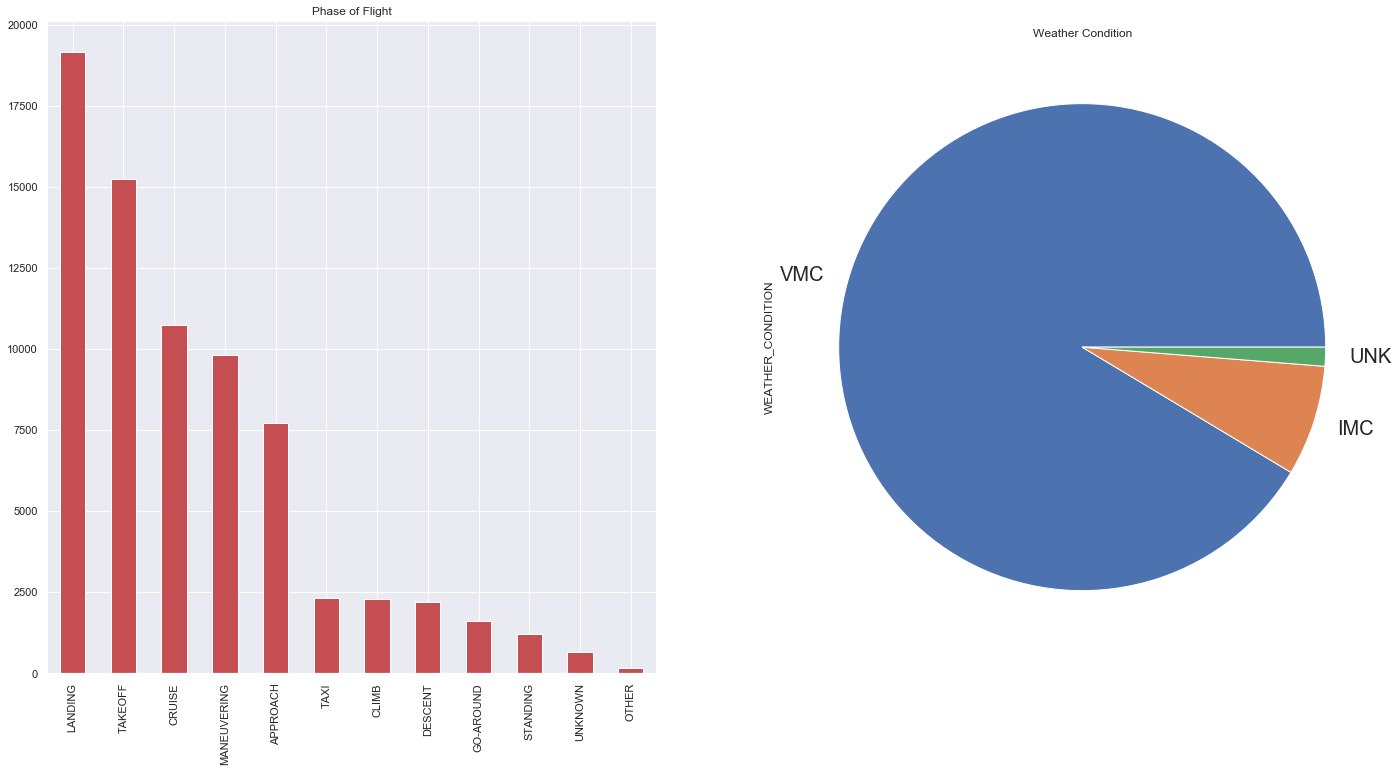

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (24, 12))
data["BROAD_PHASE_OF_FLIGHT"].value_counts().plot(ax = axes[0], kind = 'bar', title = 'Phase of Flight',color = 'r')
data["WEATHER_CONDITION"].value_counts().plot(ax = axes[1], kind = 'pie', title = 'Weather Condition', fontsize = 20)

## Visualize broad phase of flight with percentage 

<Figure size 1440x1440 with 0 Axes>

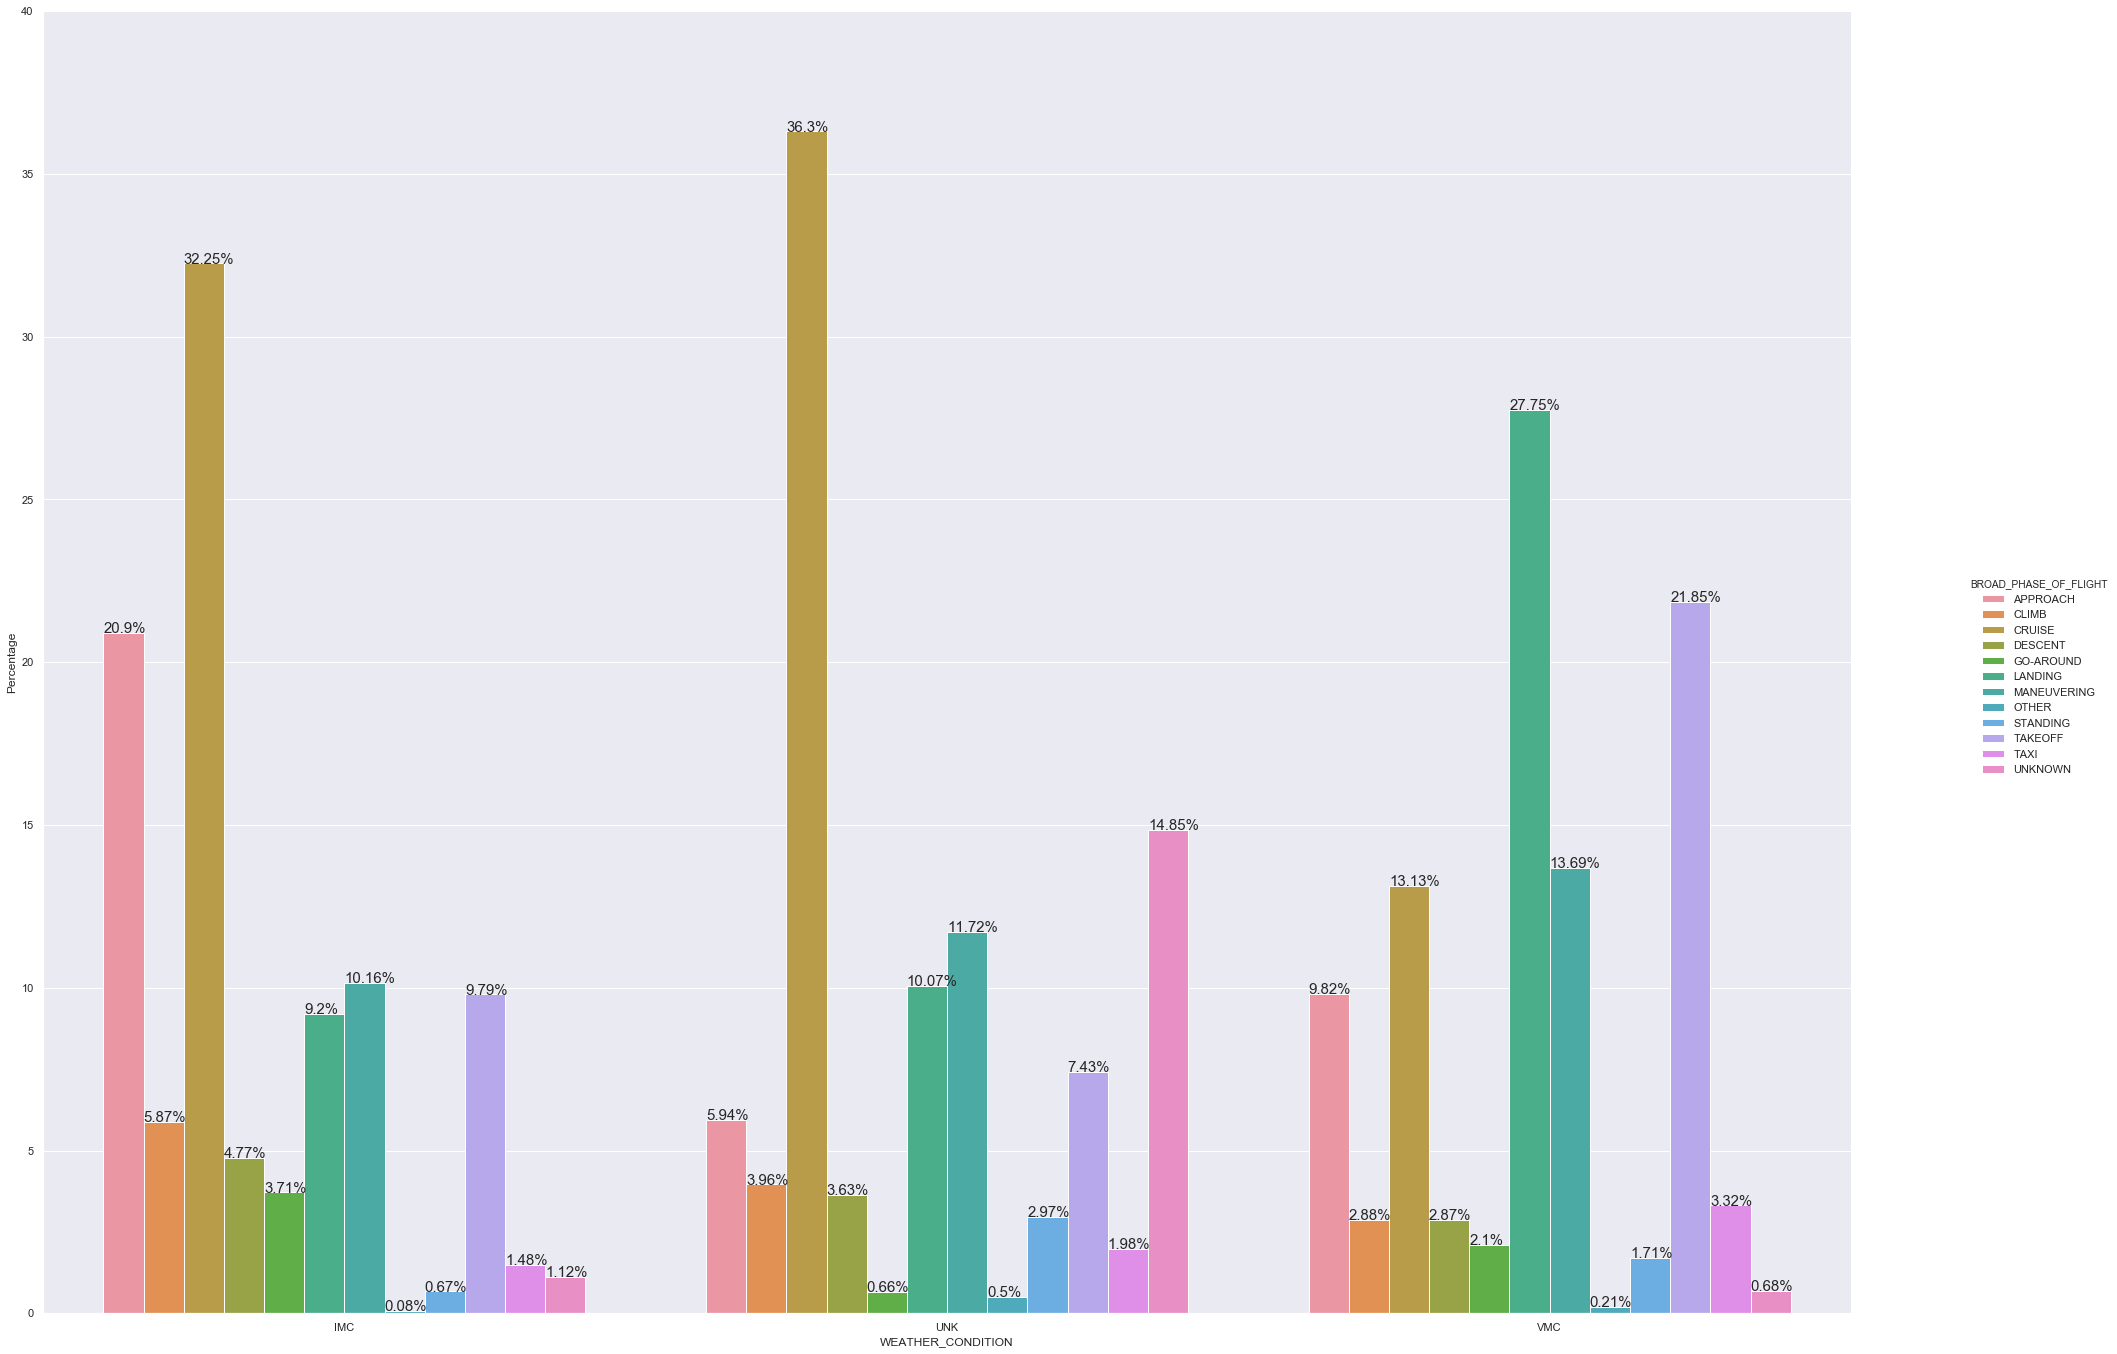

In [9]:
# Visualisation with percentage
x,y = "WEATHER_CONDITION", "BROAD_PHASE_OF_FLIGHT"
wp = data.groupby(x)[y].value_counts(normalize=True)
wp = wp.mul(100)
wp = wp.rename('Percentage').reset_index()
wp = wp.sort_values(by=["WEATHER_CONDITION", "BROAD_PHASE_OF_FLIGHT"])
plt.figure(figsize = (20, 20))
g = sb.catplot(x=x,y='Percentage',hue=y,kind='bar',data=wp, height=8, aspect=2)
g.ax.set_ylim(0,40)

g.fig.set_figheight(20)
g.fig.set_figwidth(30)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt, fontsize = 15)

## Distribution  and data skewness for numerical variables

For the dataset natural, our group recognized 2 types for numerical variables:

- **Continous numerical**

- **Discrete numerical**

## Continuous numerical variables

In [57]:
# discrete numerical data
cNum = pd.DataFrame(data[["LATITUDE", "LONGITUDE"]])
# clean discrete numerical data
cNum.fillna(value = "0", inplace = True) # Fill missing values in data
# Replacing values that contain 'N/A' to a numeric value of 0 to indicate as null instead.
cNum.replace('N/A', 0)
# convert data to integer
cNum = cNum.astype('float')
cNum.head()

,LATITUDE,LONGITUDE
0,0.000000,0.0000
1,0.000000,0.0000
2,30.532500,-91.3150
3,34.454722,-110.0575
4,0.000000,0.0000


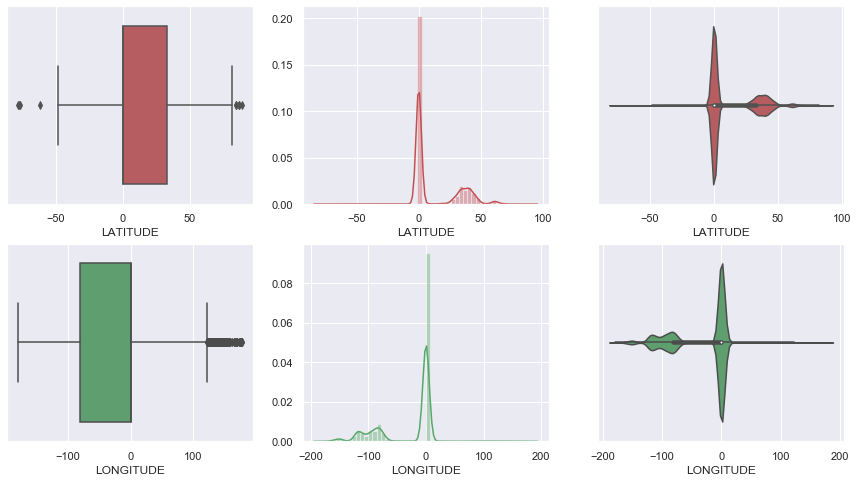

In [58]:
# Draw the distributions of all variables
f, axes = plt.subplots(2, 3, figsize=(15, 8))
colors = ["r", "g"]

count = 0
for var in cNum:
    sb.boxplot(cNum[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(cNum[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(cNum[var], color = colors[count], ax = axes[count,2])
    count += 1

In [59]:
## Skewness of contiuous numerical variables
cols = []
lst = []
val = []
print("Skewness of continous numeric variables")
for var in cNum:
  cols.append(var)
  val.append(cNum[var].skew())
lst.append(val)
cNumSkew = pd.DataFrame(lst, columns=cols)
cNumSkew.head()

Skewness of continous numeric variables


,LATITUDE,LONGITUDE
0,0.978403,-0.825775


## Discrete Numerical variables

In [62]:
# discrete numerical data
dNum = pd.DataFrame(data[["NUMBER_OF_ENGINES","TOTAL_FATAL_INJURIES","TOTAL_SERIOUS_INJURIES","TOTAL_MINOR_INJURIES","TOTAL_UNINJURED"]])

# clean discrete numerical data
# Fill missing values in data
dNum.fillna(value = 0, inplace = True)

# Replacing values that contain 'N/A' to a numeric value of 0 to indicate as null instead.
dNum.replace('N/A', 0)

# convert data to integer
dNum = dNum.astype('int')
dNum.head()


,NUMBER_OF_ENGINES,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED
0,1,0,0,0,1
1,0,0,0,0,2
2,1,0,0,0,1
3,1,0,0,0,2
4,1,0,1,0,1


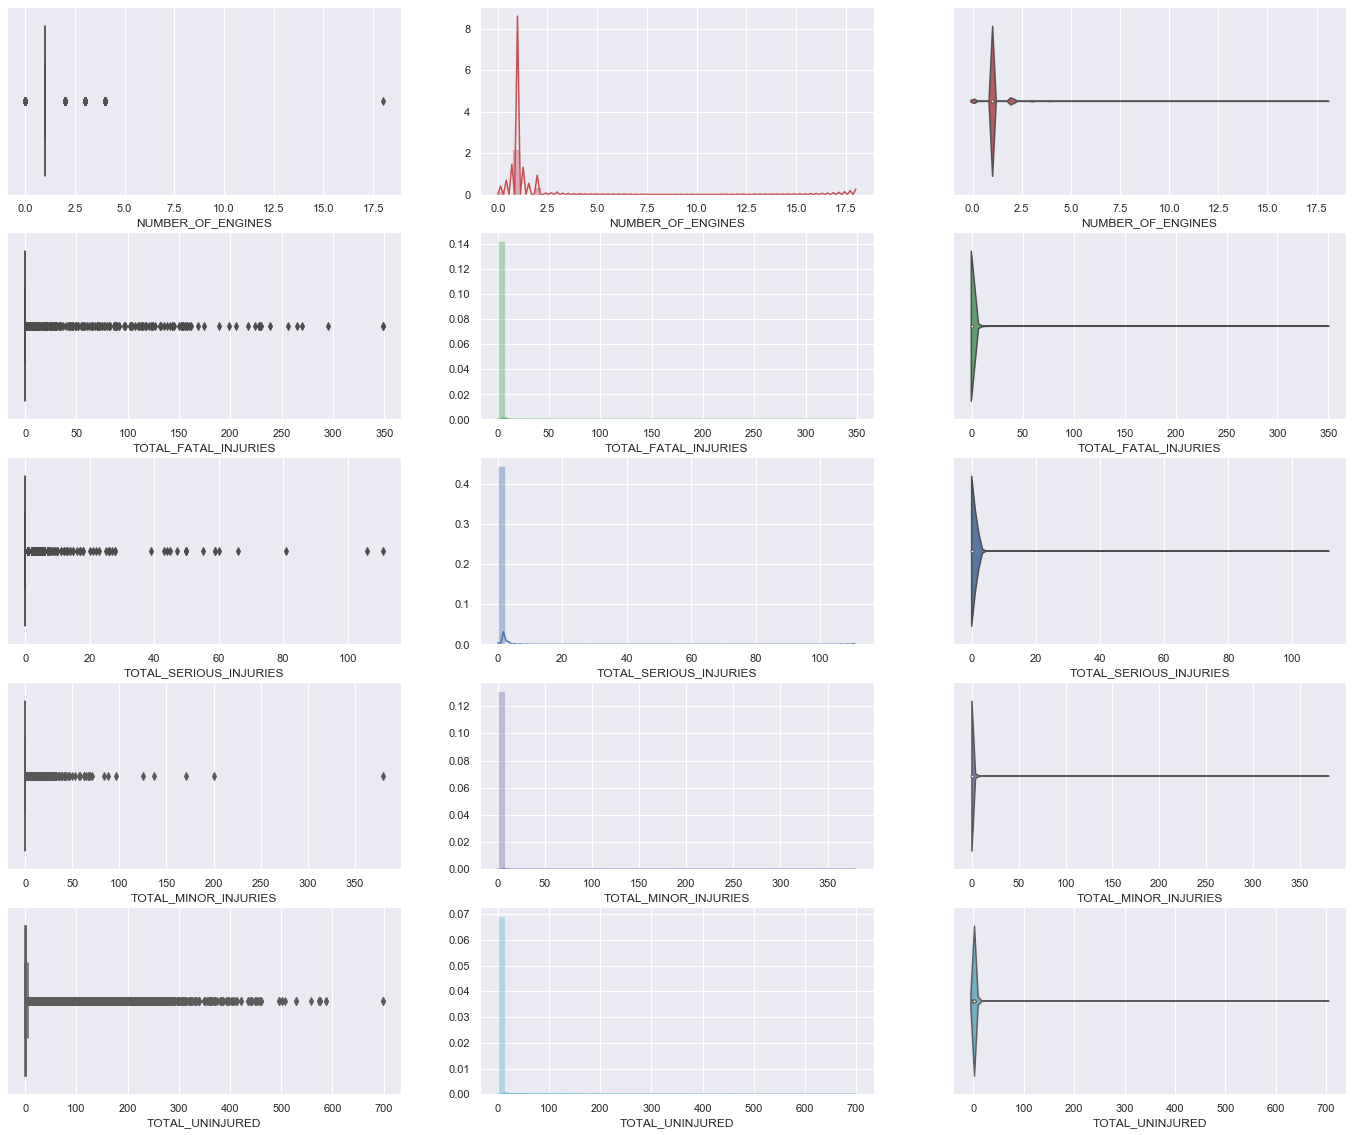

In [63]:
# Draw the distributions of all variables
f, axes = plt.subplots(5, 3, figsize=(24, 20))
colors = ["r", "g", "b", "m", "c"]

count = 0
for var in dNum:
    sb.boxplot(dNum[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(dNum[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(dNum[var], color = colors[count], ax = axes[count,2])
    count += 1

In [64]:
# skewness of discrete numerical variables
cols = []
lst = []
val = []
print("Skewness of discrete numeric variables")
for var in dNum:
  cols.append(var)
  val.append(dNum[var].skew())
lst.append(val)
dNumSkew = pd.DataFrame(lst, columns=cols)
dNumSkew.head()

Skewness of discrete numeric variables


,NUMBER_OF_ENGINES,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED
0,1.830708,34.972586,44.581533,79.49861,9.764464


## Correlation matrix between each numerical variables in the dataset

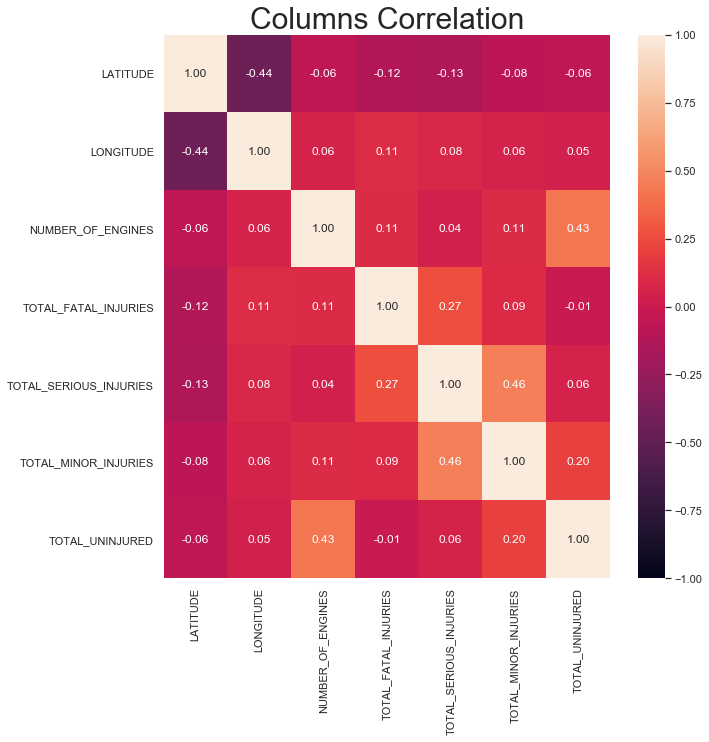

In [68]:
f, axes = plt.subplots(1, 1, figsize = (10, 10))
plt.title("Columns Correlation", fontsize = 30)
sb.heatmap(data.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f')

## Pairplot of those discrete numerical variables

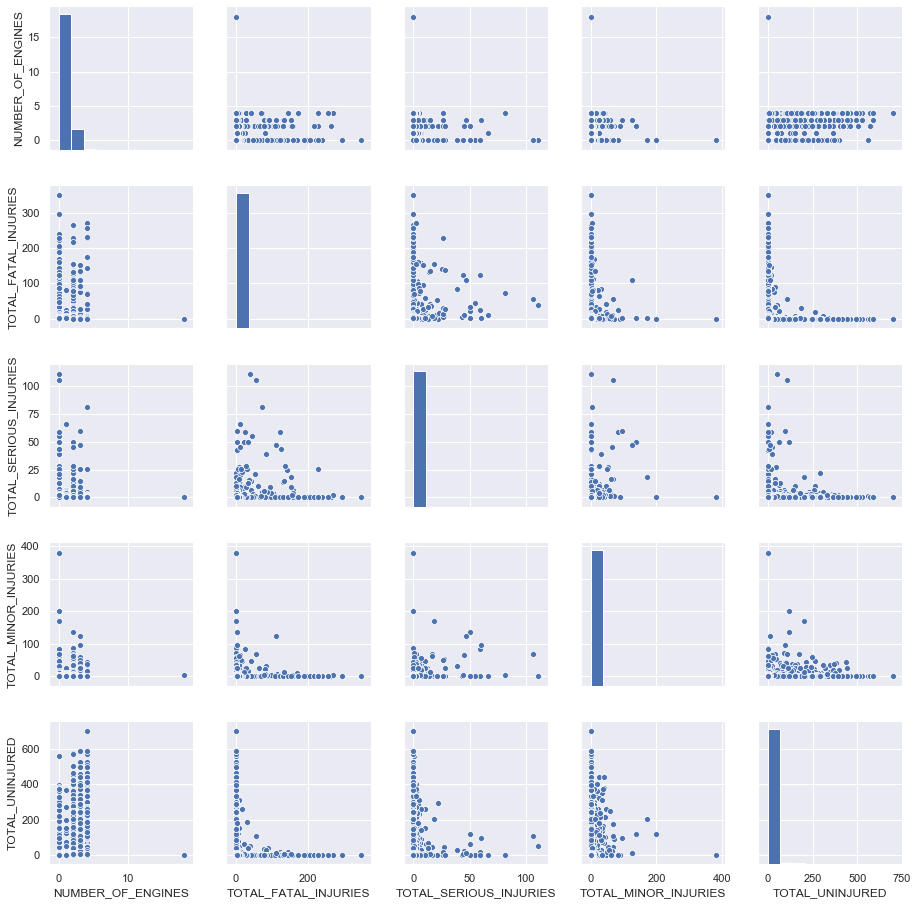

In [67]:
sb.pairplot(dNum)

In [11]:
# Extract the Features from the Data
X = pd.DataFrame(data).select_dtypes([np.number])
# Check the Dataset
X.info()
# clean features X
X.fillna(value = "0", inplace = True) # Fill missing values in data
# Replacing values that contain 'N/A' to a numeric value of 0 to indicate as null instead.
X.replace('N/A', 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79141 entries, 0 to 79140
Data columns (total 7 columns):
LATITUDE                  25614 non-null float64
LONGITUDE                 25605 non-null float64
NUMBER_OF_ENGINES         75056 non-null float64
TOTAL_FATAL_INJURIES      55944 non-null float64
TOTAL_SERIOUS_INJURIES    53724 non-null float64
TOTAL_MINOR_INJURIES      54812 non-null float64
TOTAL_UNINJURED           66860 non-null float64
dtypes: float64(7)
memory usage: 4.2 MB


,LATITUDE,LONGITUDE,NUMBER_OF_ENGINES,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED
0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,2
2,30.5325,-91.315,1,0,0,0,1
3,34.4547,-110.058,1,0,0,0,2
4,0,0,1,0,1,0,1
5,40.9711,-74.9975,1,1,0,0,0
6,29.4081,-81.5144,1,2,0,0,0
7,34.16,-115.998,0,0,0,0,1
8,44.3833,88.8525,1,0,0,1,0
9,29.89,-97.8586,1,0,0,2,0


## KMean training model to fit those data into 3 clusters

In [12]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans

# Guess the Number of Clusters
num_clust = 3

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust)

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Features 	LATITUDE 	LONGITUDE 	NUMBER_OF_ENGINES 	TOTAL_FATAL_INJURIES 	TOTAL_SERIOUS_INJURIES 	TOTAL_MINOR_INJURIES TOTAL_UNINJURED

Cluster 0:	0.46	0.93	1.08	0.68	0.22	0.33	1.92	
Cluster 1:	38.51	-100.36	1.07	0.37	0.19	0.29	1.78	
Cluster 2:	8.01	-19.69	2.02	0.13	0.52	2.41	189.05	

Within Cluster Sum of Squares : 41057830.85237415



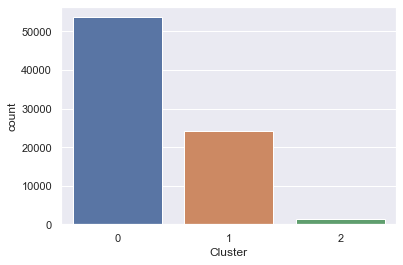

In [13]:
# Print the Cluster Centers
print("Features", "\tLATITUDE", "\tLONGITUDE", "\tNUMBER_OF_ENGINES", "\tTOTAL_FATAL_INJURIES", "\tTOTAL_SERIOUS_INJURIES", 
      "\tTOTAL_MINOR_INJURIES", "TOTAL_UNINJURED")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

C:\Users\v\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning:

Data must have variance to compute a kernel density estimate.



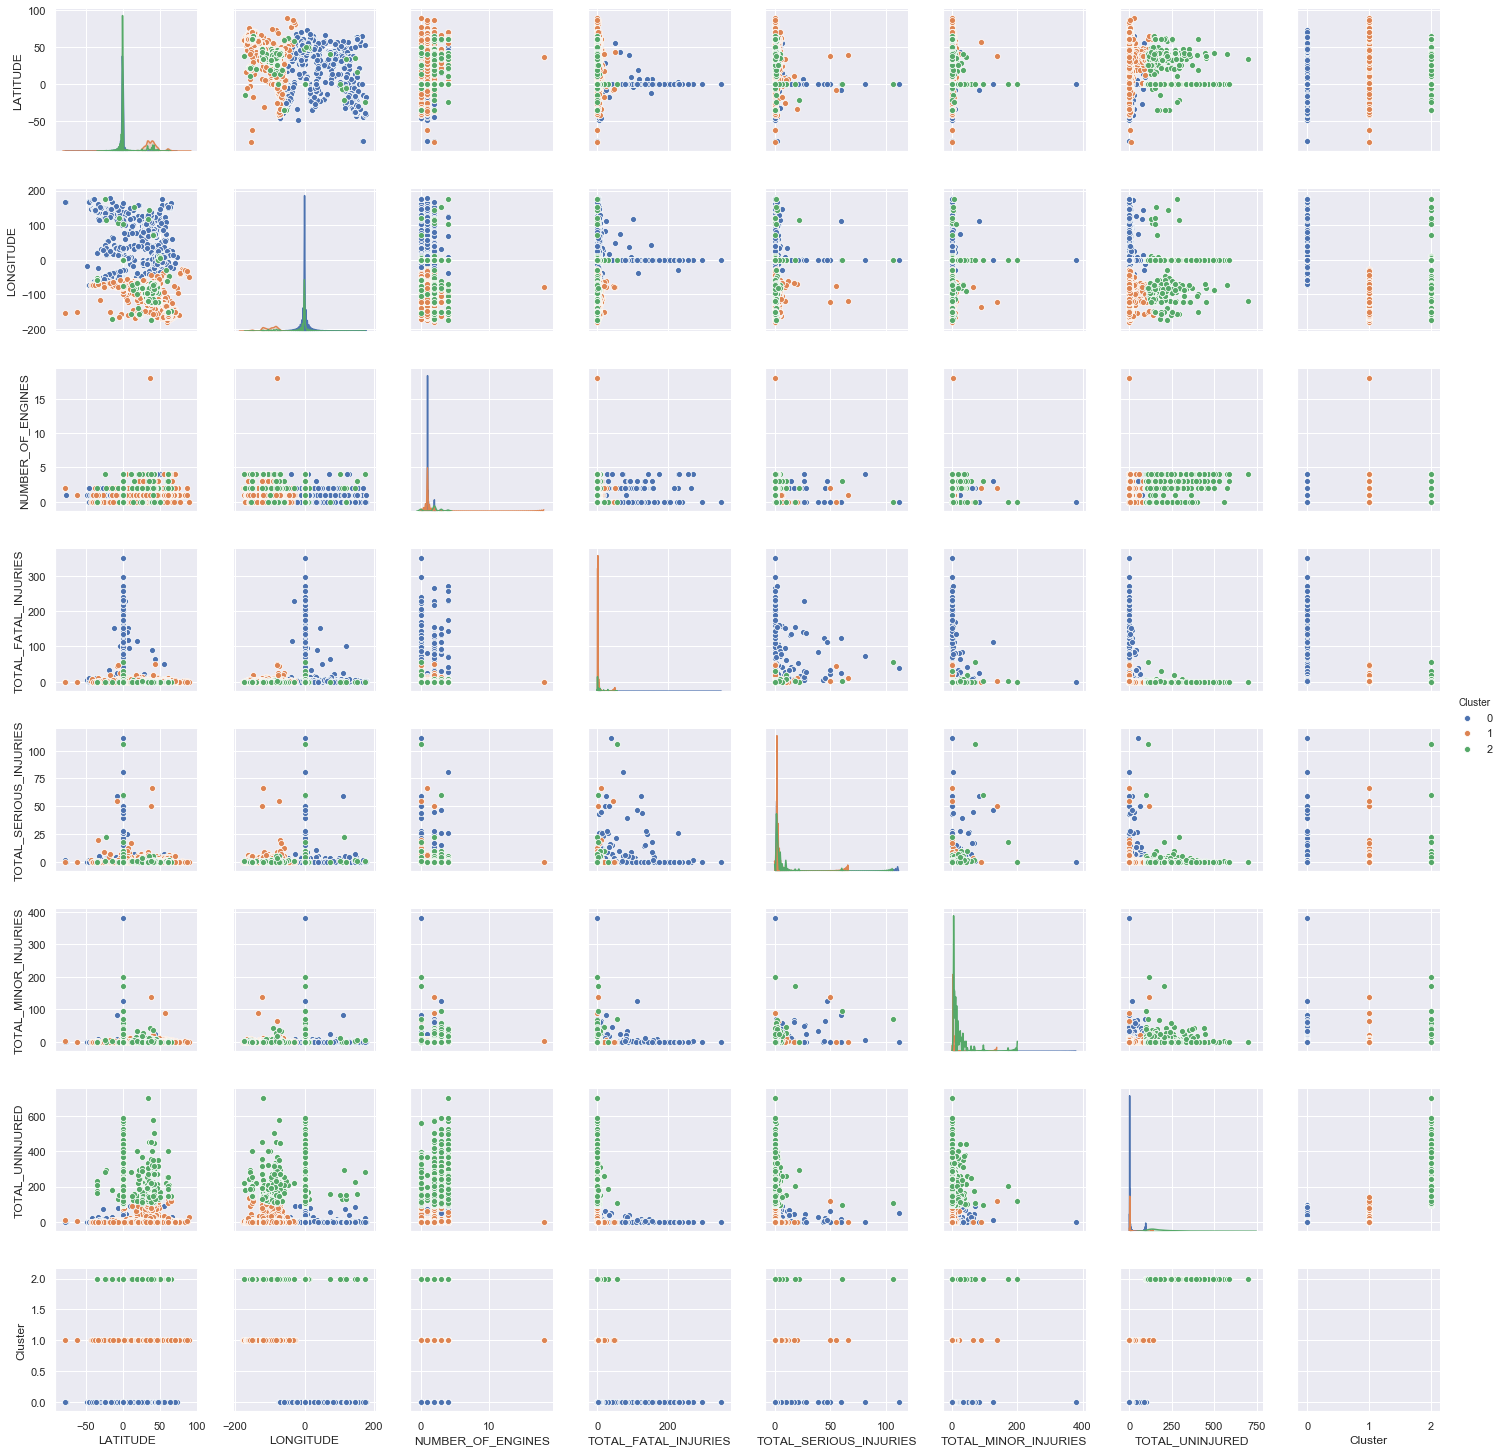

In [14]:
# Plot the Clusters on 2D grids 
# clone the X dataframe to another s
T = X_labeled.copy()
T.iloc[:, :7] = T.iloc[:, :7].astype("float64")
# pairplot on the dataset 
sb.pairplot(T, vars = T.columns, hue = "Cluster")

# Problem 1: Predict which Make cause accident.

In [35]:
# aircraft manufacturer with least amount of injuries
df = data.dropna() 
df["TOTAL_INJURIES"] = df["TOTAL_FATAL_INJURIES"] + df["TOTAL_SERIOUS_INJURIES"] + df["TOTAL_MINOR_INJURIES"]
# sort values by total of injuries
df.sort_values(["TOTAL_INJURIES"], ascending = False)
# top five injuries records
df.head()

C:\Users\v\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,EVENT_DATE,LOCATION,COUNTRY,LATITUDE,LONGITUDE,AIRPORT_CODE,AIRPORT_NAME,INJURY_SEVERITY,AIRCRAFT_DAMAGE,AIRCRAFT_CATEGORY,...,NUMBER_OF_ENGINES,ENGINE_TYPE,PURPOSE_OF_FLIGHT,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER_CONDITION,BROAD_PHASE_OF_FLIGHT,TOTAL_INJURIES
13429,25/11/2008,"Monterey, CA",United States,36.586944,-121.842777,MRY,Monterey Peninsula Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,DESCENT,2.0
13559,24/10/2008,"Breckenridge, TX",United States,32.718889,-98.891111,BKD,Stephens County,Non-Fatal,Destroyed,Airplane,...,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,GO-AROUND,2.0
13581,19/10/2008,"Angleton, TX",United States,29.248889,-95.328056,KLBX,Brazoria County Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,APPROACH,0.0
13614,10/10/2008,"Placerville, CA",United States,38.724167,-120.753333,PVF,Placerville Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,GO-AROUND,0.0
13640,5/10/2008,"Sandy Valley, NV",United States,35.795000,-115.627223,3L2,Sky Ranch Airport,Fatal(1),Substantial,Airplane,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,MANEUVERING,1.0


In [36]:
# top five location has highest rate of accidents
df.loc[~df['MAKE'].astype(str).str.isdigit()]

,EVENT_DATE,LOCATION,COUNTRY,LATITUDE,LONGITUDE,AIRPORT_CODE,AIRPORT_NAME,INJURY_SEVERITY,AIRCRAFT_DAMAGE,AIRCRAFT_CATEGORY,...,NUMBER_OF_ENGINES,ENGINE_TYPE,PURPOSE_OF_FLIGHT,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER_CONDITION,BROAD_PHASE_OF_FLIGHT,TOTAL_INJURIES
13429,25/11/2008,"Monterey, CA",United States,36.586944,-121.842777,MRY,Monterey Peninsula Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,1.0,1.0,0.0,VMC,DESCENT,2.0
13559,24/10/2008,"Breckenridge, TX",United States,32.718889,-98.891111,BKD,Stephens County,Non-Fatal,Destroyed,Airplane,...,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,GO-AROUND,2.0
13581,19/10/2008,"Angleton, TX",United States,29.248889,-95.328056,KLBX,Brazoria County Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,APPROACH,0.0
13614,10/10/2008,"Placerville, CA",United States,38.724167,-120.753333,PVF,Placerville Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,GO-AROUND,0.0
13640,5/10/2008,"Sandy Valley, NV",United States,35.795000,-115.627223,3L2,Sky Ranch Airport,Fatal(1),Substantial,Airplane,...,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,VMC,MANEUVERING,1.0
13657,1/10/2008,"Blaine, WA",United States,48.990000,-122.732223,4W6,Blaine Municipal Airport,Non-Fatal,Substantial,Helicopter,...,1.0,Turbo Shaft,Public Aircraft,0.0,0.0,0.0,2.0,VMC,LANDING,0.0
13663,30/9/2008,"Idaho Falls, ID",United States,43.063611,-112.070556,IDA,Idaho Falls Regional Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,TAXI,0.0
13716,20/9/2008,"East Haddam, CT",United States,41.445555,-72.455556,42B,Goodspeed Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,2.0,0.0,0.0,VMC,TAKEOFF,2.0
13724,19/9/2008,"St. Louis, MO",United States,38.661944,-90.651944,SUS,Spirit of St. Louis Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,LANDING,0.0
13790,7/9/2008,"Pagosa Springs, CO",United States,37.286111,-107.055833,PSO,Stevens Field Airport,Non-Fatal,Substantial,Airplane,...,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,APPROACH,0.0


In [37]:
# ranking the top 5 reliable Makes 
top5_reliable = df['MAKE'].head(5)[::1]
top5_reliable = top5_reliable.reset_index()
top5_reliable.columns = ["TOTAL_INJURIES", "MAKE"]
top5_reliable.head(5)

,TOTAL_INJURIES,MAKE
0,13429,PIPER
1,13559,Rans
2,13581,CESSNA
3,13614,CESSNA
4,13640,Bonde


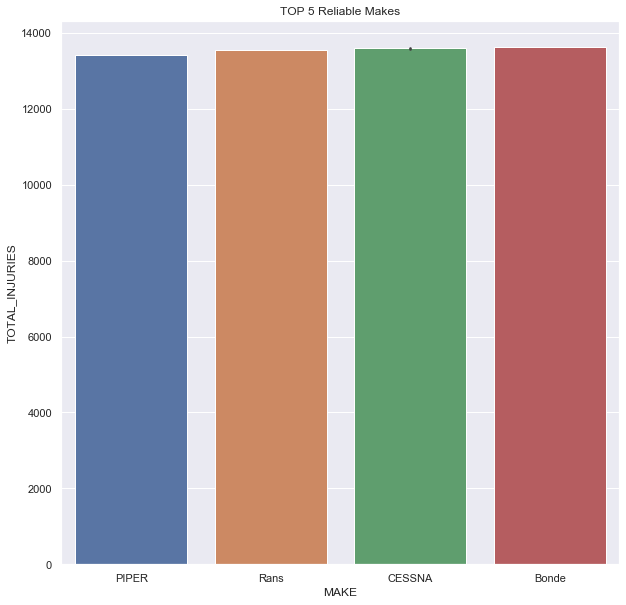

In [39]:
# visualizing in the form of barchart 
fig, axes = plt.subplots(1, 1, figsize = (10, 10))
plt.title("TOP 5 Reliable Makes")
sb.barplot(x = "MAKE",y = "TOTAL_INJURIES", data = top5_reliable)

## Classification Decision Training model

In [40]:
make = pd.DataFrame(df['MAKE'])                          # Response
total_injuries = pd.DataFrame(df['TOTAL_INJURIES'])      # Predictor

In [41]:
X = df[["MAKE"]].copy()
y = df["TOTAL_INJURIES"].copy()

### Extracting the data into 80% for training set; 20% for test set

In [42]:
from sklearn.model_selection import train_test_split
# Train Set : 80%; Test Set : 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Classification Tree model for prediction 

In [43]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

# Extract the two variables X_train and y_train
y_train = pd.DataFrame(df['MAKE'])
X_train = pd.DataFrame(df['TOTAL_INJURIES'])

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

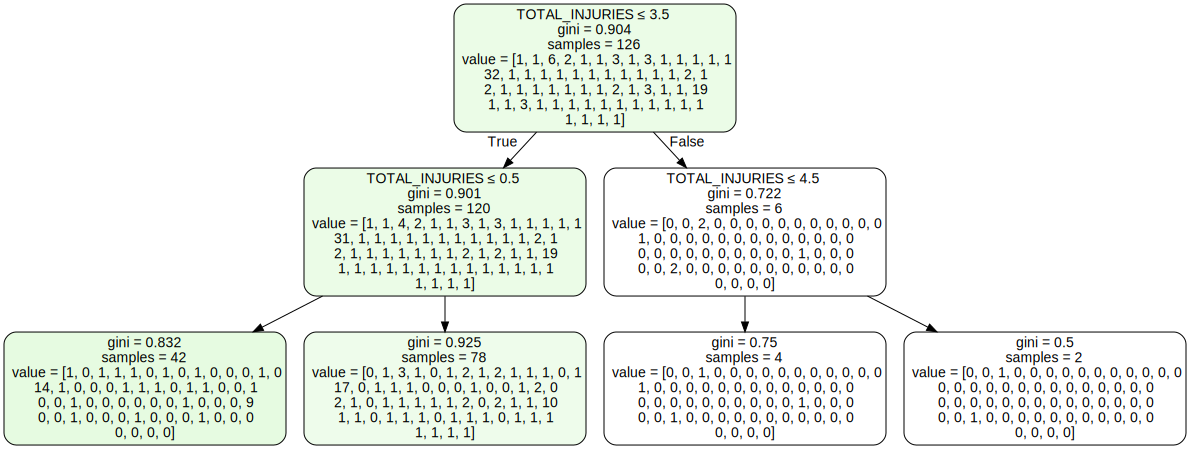

In [44]:
# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

import graphviz
graphviz.Source(treedot)

# Problem 2: Predict the severity of the accidents

Some factors could be taken in consideration:

- **ENGINE_TYPE**

- **WEATHER CONDITION**

- **BROAD_PHASE_OF_FLIGHT**

- **MAKE**

-> Ideas: divide the data into training set and test set.
What to do is: 

1. training a model (Classification, Dendrogram, Random Forest, etc) 

2. Then use such model to predict the data in the test set, then compared our build accuracy model. 

3. We might use many models to attempts this problem, then comments which model might be ideal to attempt this problem
 

In [16]:
# aircraft damage statistic information
data["AIRCRAFT_DAMAGE"].describe()

count           76742
unique              3
top       Substantial
freq            56939
Name: AIRCRAFT_DAMAGE, dtype: object

## Divide the data into trainning set and test set

- 80% data used for training; the remaining used for testing.

- For those categorical column used for prediction, using the **Label Encoder** for encoding those data into numerical value.


In [17]:
# divide the data into test set and training set (20%:80%)
# train 2 models to solve the same problem: Classification Tree & Dendrogram
X = data[["ENGINE_TYPE", "WEATHER_CONDITION", "BROAD_PHASE_OF_FLIGHT", "MAKE"]].copy()
X.fillna(value = "0", inplace = True) # Fill missing values in data
y = data["AIRCRAFT_DAMAGE"].copy()
y.fillna(value = "Substantial", inplace = True)
# data cleaning and converting categorical variables to numerical values
X["ENGINE_TYPE"]= LabelEncoder().fit_transform(X["ENGINE_TYPE"].astype("str")) 
X["WEATHER_CONDITION"] = LabelEncoder().fit_transform(X["WEATHER_CONDITION"].astype("str")) 
X["BROAD_PHASE_OF_FLIGHT"] = LabelEncoder().fit_transform(X["BROAD_PHASE_OF_FLIGHT"].astype("str")) 
X["MAKE"] = LabelEncoder().fit_transform(X["MAKE"].astype("str")) 
# divide the data to test set and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

## Logistic Model prediction 

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0, multi_class = "ovr")

In [19]:
# logistic model
lr.fit(X_train,y_train)
train_predict =  lr.predict(X_train)
# accuracy printing for training set
print("Logistic model prediction accuracy: {} for training set".format(lr.score(X_train, y_train)))

C:\Users\v\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Logistic model prediction accuracy: 0.7475044225423301 for training set


In [20]:
test_predict = lr.predict(X_test)
# accuracy printing fo test set
print("Logistic model prediction accuracy: {} for test set".format(lr.score(X_test, y_test)))

Logistic model prediction accuracy: 0.745024954197991 for test set


## Neural Network model applied prediction

In [21]:
from sklearn.neural_network import MLPClassifier

## Choosing suitable hidden layer sizes parameters

- For the sake of simplicity, in this case, we will merely consider the neural network with 2 hidden layers, one hidden layer with m synopses in first hidden layer and n synopses in the second hidden layer.

- By training different 2 hidden layers - neural network with different m, n parameters, we will find which is the most suitable m, n should use for prediction the fatality of the accident. 

m = 1 and n = 1 is optimal value for training dataset with accuracy = 0.7500315895880718
m = 5 and n = 3 is optimal value for test dataset with accuracy = 0.7488154652852359


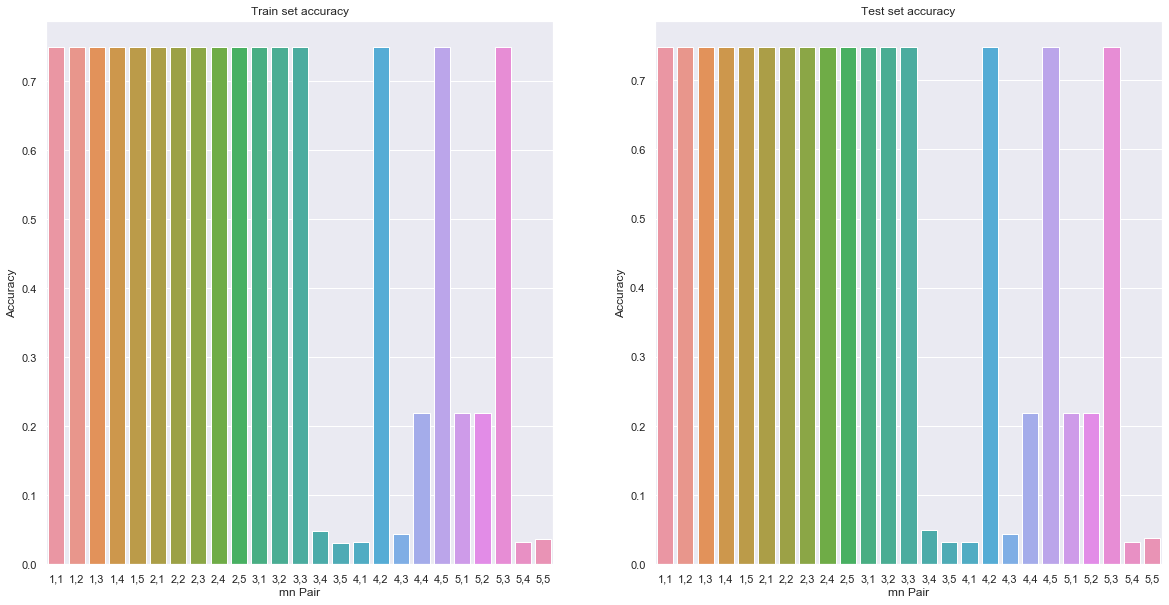

In [22]:
mn = []
train_scores = []
test_scores = []
max_score_for_train = 0
max_score_for_test = 0
# m, n values of train and test set that the model with hidden_layers(m, n) performed most accuracy
m_train, m_test, n_train, n_test = 1, 1, 1, 1 
# the parameters ranging from 1 to 5
for m in range(1, 6):
    for n in range(1, 6):
        mlp = MLPClassifier(solver = "lbfgs", alpha = 1e-5, hidden_layer_sizes = (m , n), random_state = 1)
        mlp.fit(X_train, y_train)
        mn.append("{},{}".format(m, n))
        # for training set
        train_score = mlp.score(X_train, y_train)
        train_scores.append(train_score)
        if max_score_for_train < train_score:
            max_score_for_train = train_score
            m_train , n_train = m, n
        # for test set
        test_score = mlp.score(X_test, y_test)
        test_scores.append(test_score)
        if max_score_for_test < test_score:
            max_score_for_test = test_score
            m_test , n_test = m, n

# training dataset analysis 
print("m = {} and n = {} is optimal value for training dataset with accuracy = {}".format(m_train,n_train, max_score_for_train))                         
print("m = {} and n = {} is optimal value for test dataset with accuracy = {}".format(m_test,n_test, max_score_for_test))
f, axes = plt.subplots(1, 2, figsize = (20, 10))
# train set and test set accuracy plotting for different m, n values 
# train set
sb.barplot(x = mn, y = train_scores, ax = axes[0])
axes[0].set_title("Train set accuracy")
axes[0].set_xlabel("mn Pair")
axes[0].set_ylabel("Accuracy")
# test set
sb.barplot(x = mn, y = test_scores, ax = axes[1])
axes[1].set_title("Test set accuracy")
axes[1].set_xlabel("mn Pair")
axes[1].set_ylabel("Accuracy")

plt.show()

## Comments:

- For this problem,

+) With training set, when m = 1, n = 1, it achieved most accuracy compared to others.

+) However, with the test set, while m = 5, n = 3 achieved most accuracy, however, when m = n = 1, its model somehow perform comparable to those higher layer without too much heavy computations.

###  It is interesting to see that increasing the layer numbers not necessarily improve the performace of the model significantly.

### With neural network applied for prediction, the accuracy is literally improved compared  to logistic Regression as the highest accuracy achieved by each of the attempts.

# Problem 3: Find out which accidents are outliers compared to others
1. Some factors could be taken in consideration:

- ENGINE_TYPE
- WEATHER CONDITION
- BROAD_PHASE_OF_FLIGHT
- MAKE
- NO_OF_UNINJURED
- etc...

2. Might use the Dendrogram Model | Kmean| KMean++ to detect which accidents is outliers 

3. Different models could be used for this problem in order to compare which model is more understandable 

## Extract the data needed to detect anomaly

In [23]:
data.fillna(value = "0", inplace = True)
data.replace("N/A", 0)
# Extract variables needed from data set.
anamolyData = pd.DataFrame(data[["TOTAL_FATAL_INJURIES", "TOTAL_SERIOUS_INJURIES", "TOTAL_MINOR_INJURIES", "TOTAL_UNINJURED"]])

# Converting dtype
odd = anamolyData.astype('int')

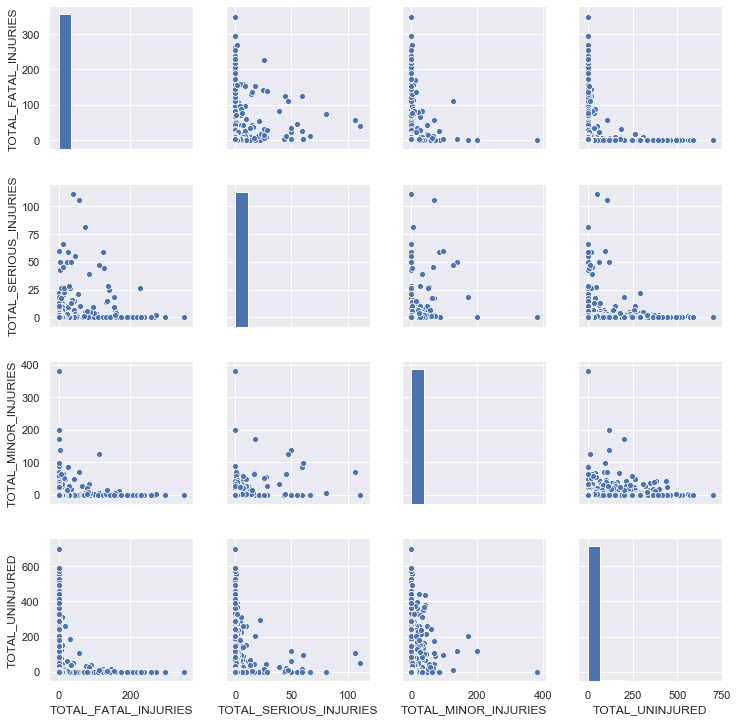

In [24]:
# Plot the Raw Data on 2D grids
sb.pairplot(odd)

# LocalOutlierFactor model for detecting anomalies

In [25]:
# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 50      # Number of Neighbors
cont_fraction = 0.1    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(odd)

LocalOutlierFactor(algorithm='auto', contamination=0.1, leaf_size=30,
                   metric='minkowski', metric_params=None, n_jobs=None,
                   n_neighbors=50, novelty=False, p=2)

## Barplot between "normal" and "anomaly" accidents.  

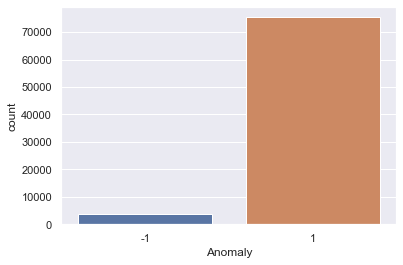

In [26]:
# Predict the Anomalies
labels = lof.fit_predict(odd)

# Append Labels to the Data
X_labeled = odd.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

## Visualize anomalies in the data

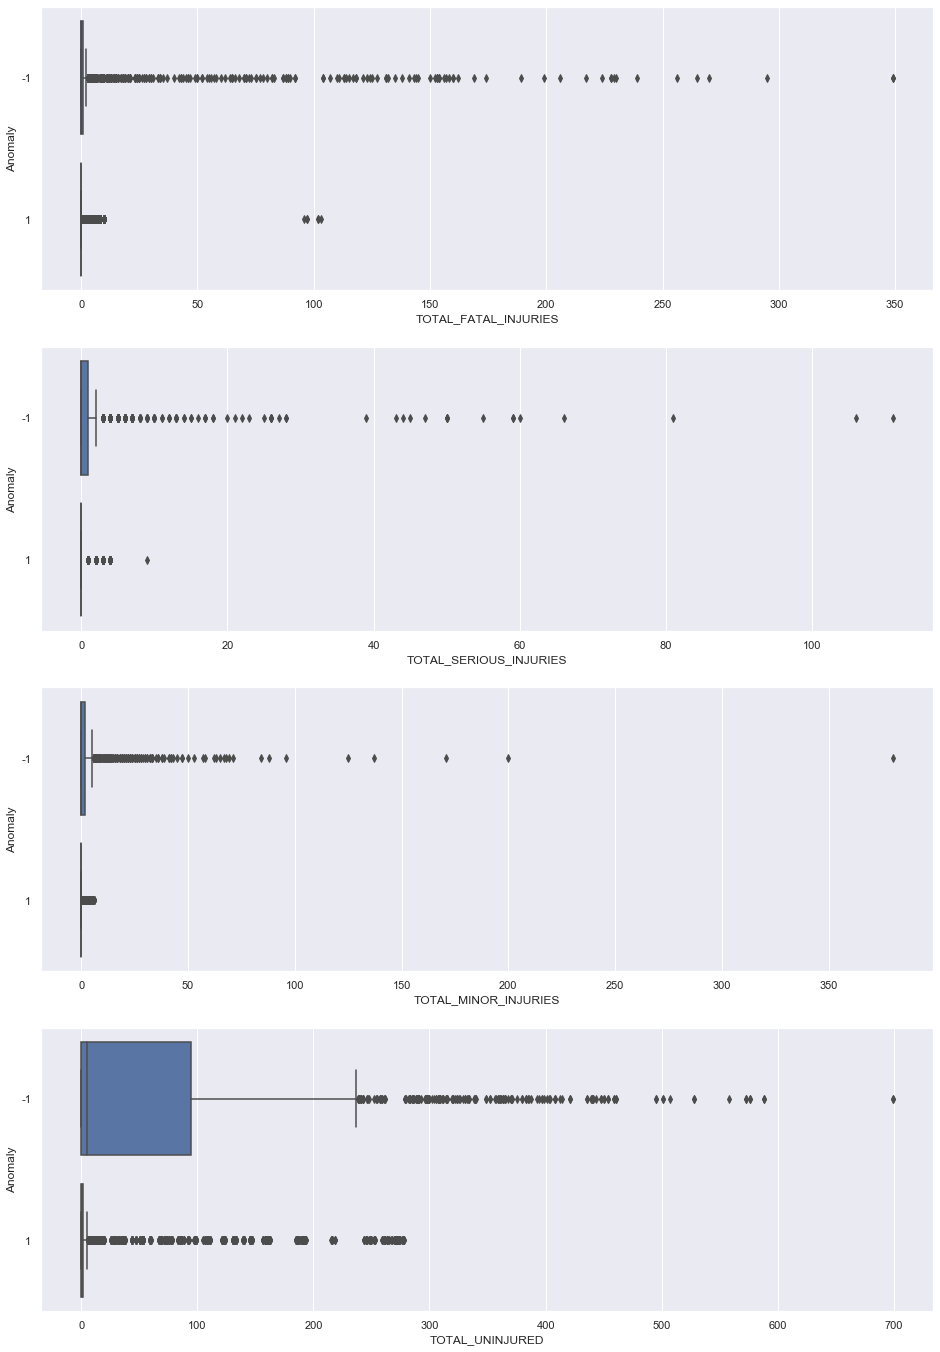

In [27]:
# Boxplots for all Features against the Anomalies
f, axes = plt.subplots(4, 1, figsize=(16,24))
sb.boxplot(x = 'TOTAL_FATAL_INJURIES', y = 'Anomaly', data = X_labeled, ax = axes[0])
sb.boxplot(x = 'TOTAL_SERIOUS_INJURIES', y = 'Anomaly', data = X_labeled, ax = axes[1])
sb.boxplot(x = 'TOTAL_MINOR_INJURIES', y = 'Anomaly', data = X_labeled, ax = axes[2])
sb.boxplot(x = 'TOTAL_UNINJURED', y = 'Anomaly', data = X_labeled, ax = axes[3])

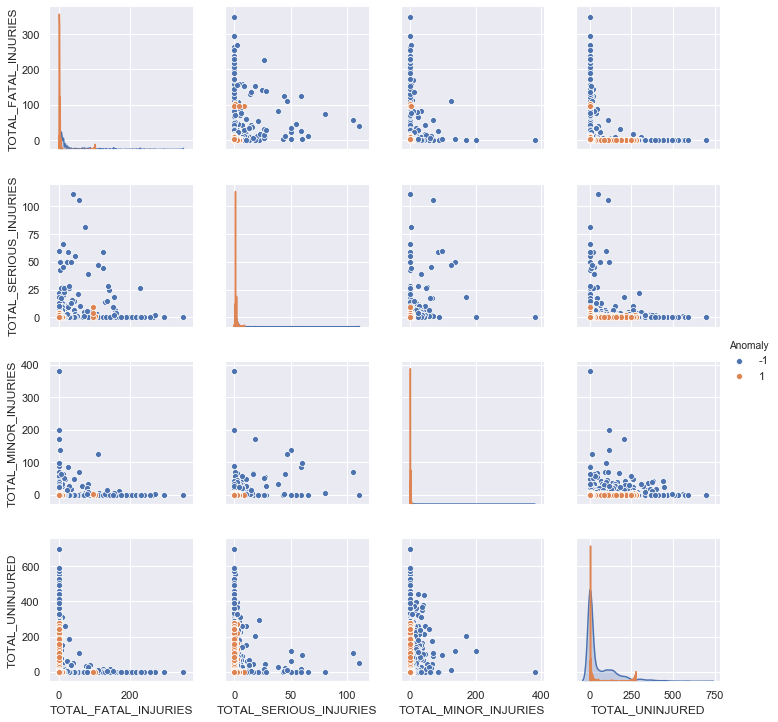

In [28]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = odd.columns.values, hue = "Anomaly")

# DBScan model for anomaly detection

In [29]:
model = DBSCAN(eps=1, min_samples=10).fit(odd)
print (model)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)


In [30]:
outlier = pd.DataFrame(odd)

print (Counter(model.labels_))

print (outlier[model.labels_==-1])

Counter({0: 77927, -1: 980, 2: 72, 3: 40, 10: 27, 7: 23, 4: 18, 1: 14, 8: 11, 9: 11, 6: 10, 5: 8})
       TOTAL_FATAL_INJURIES  TOTAL_SERIOUS_INJURIES  TOTAL_MINOR_INJURIES  \
94                        4                       6                     0   
330                       0                       0                     0   
358                       0                       1                     7   
439                       5                       1                     4   
575                       0                       0                     0   
788                      66                       0                     0   
923                       0                       0                     3   
988                       3                       7                     0   
1039                     62                       0                     0   
1105                     23                       0                     0   
1179                      0                       0   

Text(0.5, 1.0, 'DBSCAN')

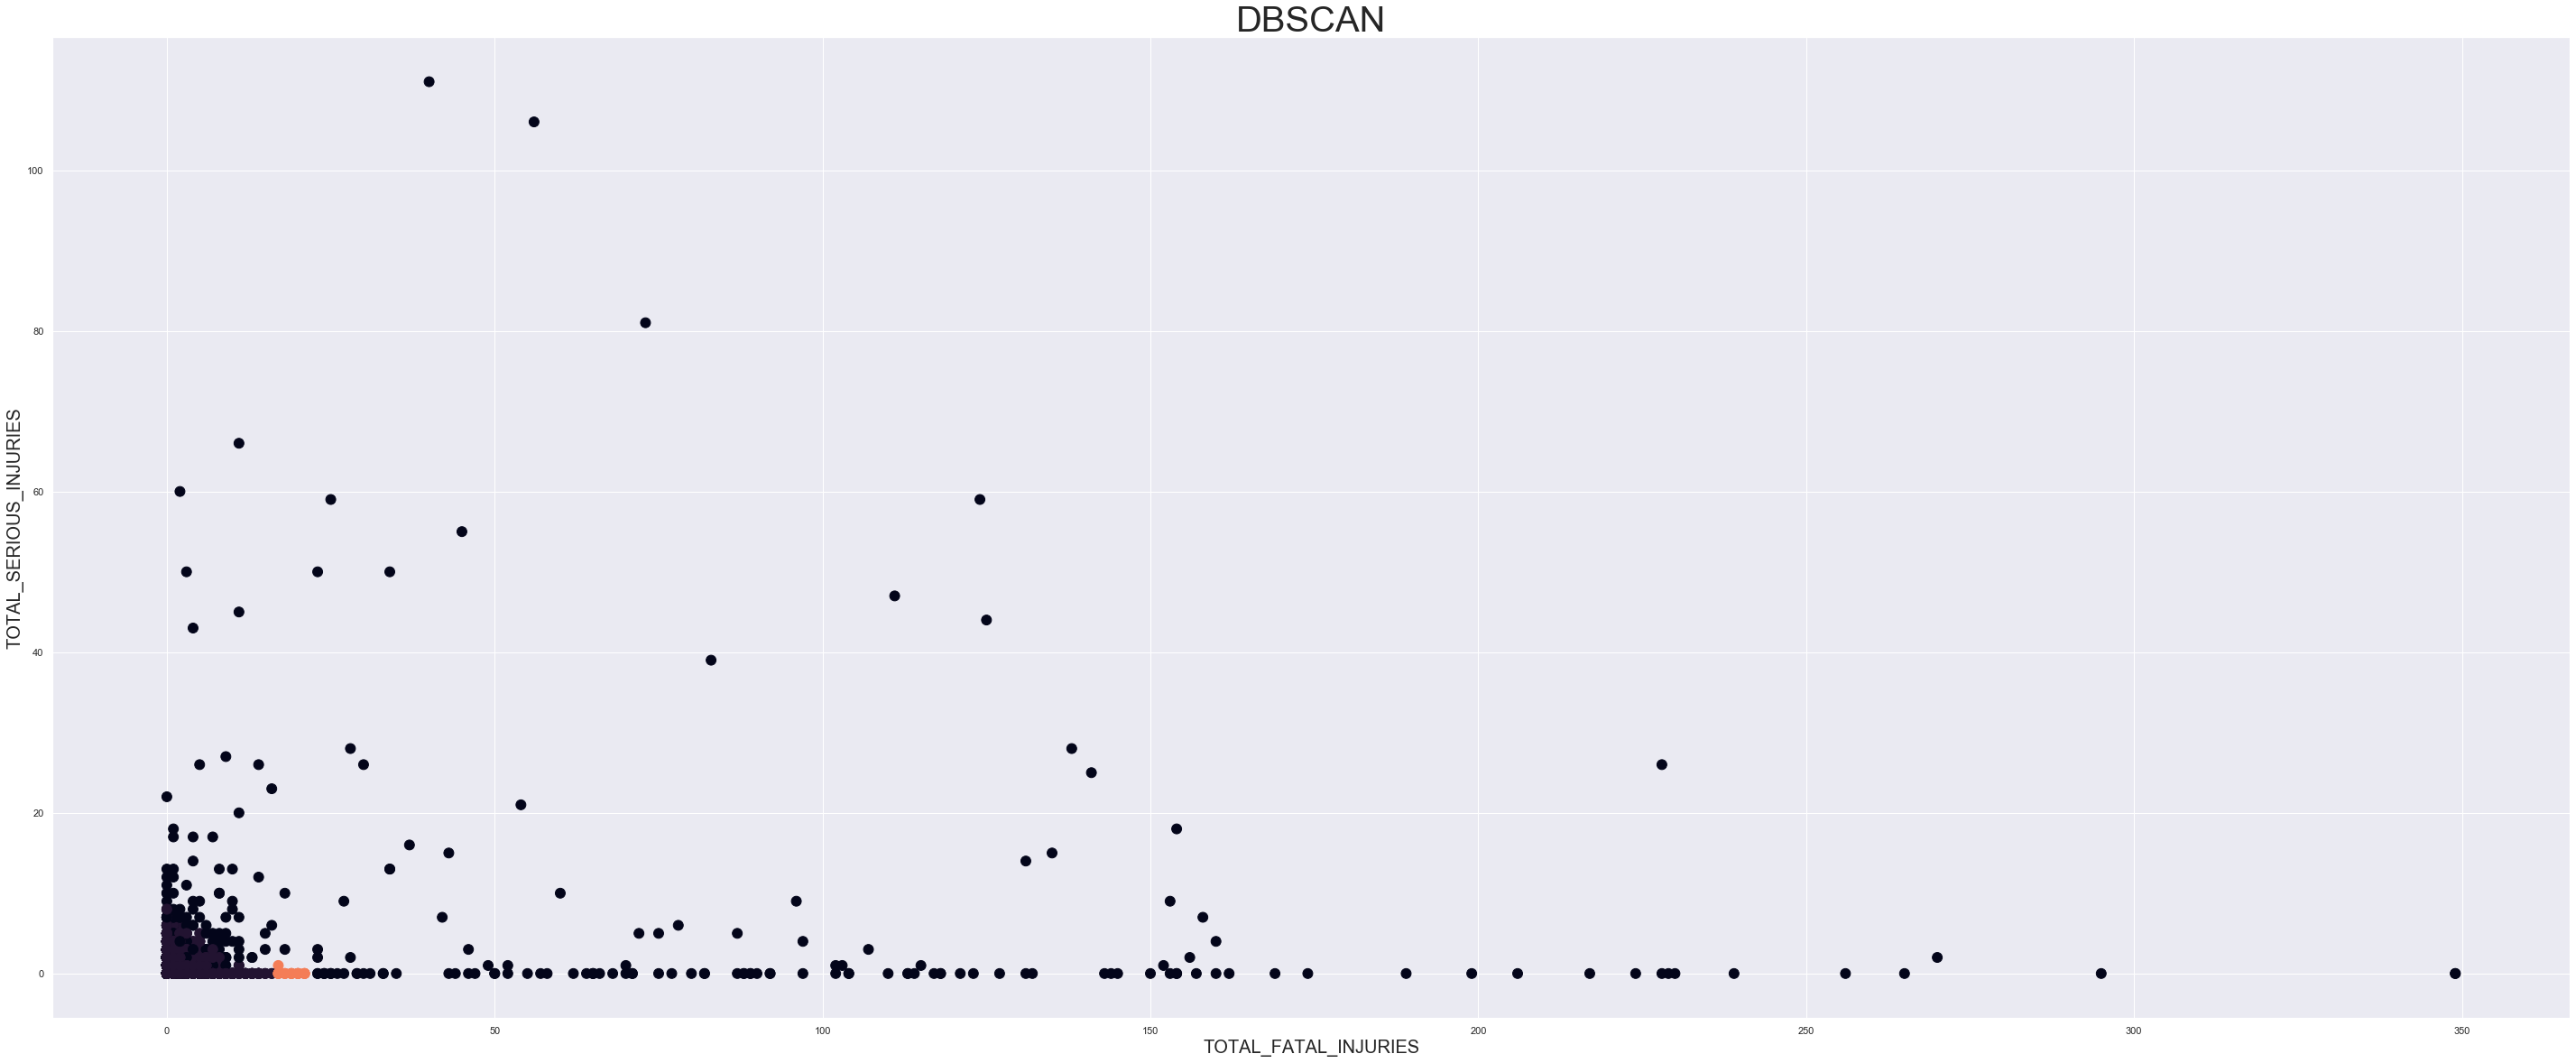

In [47]:
plt.gcf().set_size_inches(50, 20)

colors = model.labels_
plt.scatter(np.array(odd['TOTAL_FATAL_INJURIES']), np.array(odd['TOTAL_SERIOUS_INJURIES']), c=colors, s=120)

plt.xlabel('TOTAL_FATAL_INJURIES', fontsize = 20)
plt.ylabel('TOTAL_SERIOUS_INJURIES', fontsize = 20)
plt.title('DBSCAN', fontsize = 40)

Text(0.5, 1.0, 'DBSCAN')

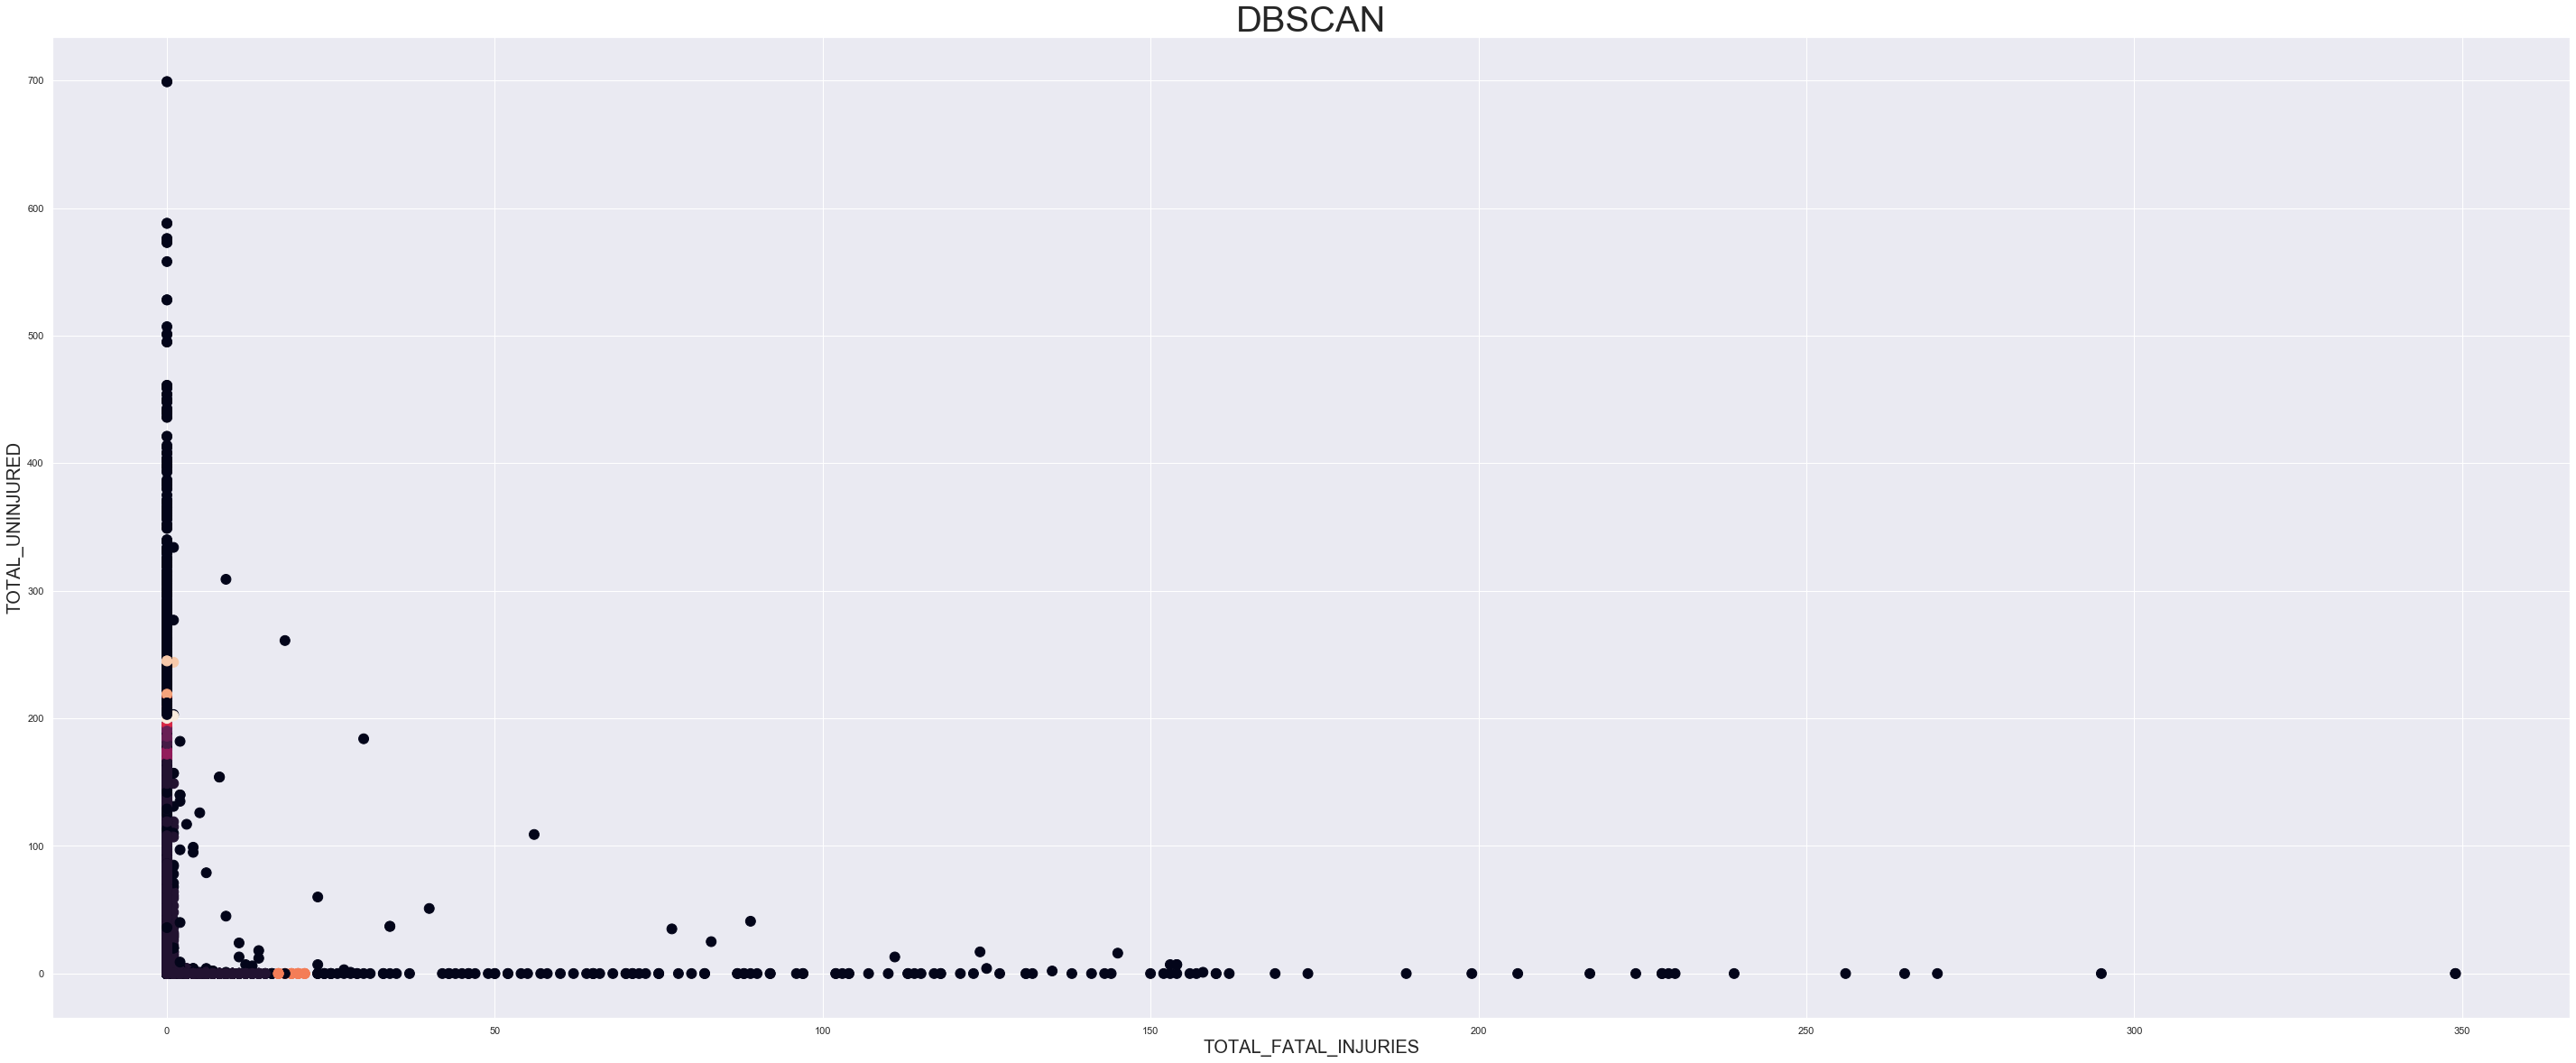

In [49]:
plt.gcf().set_size_inches(50, 20)

colors = model.labels_
plt.scatter(np.array(odd['TOTAL_FATAL_INJURIES']), np.array(odd['TOTAL_UNINJURED']), c=colors, s=120)

plt.xlabel('TOTAL_FATAL_INJURIES', fontsize = 20)
plt.ylabel('TOTAL_UNINJURED', fontsize = 20)
plt.title('DBSCAN', fontsize = 40)

Text(0.5, 1.0, 'DBSCAN')

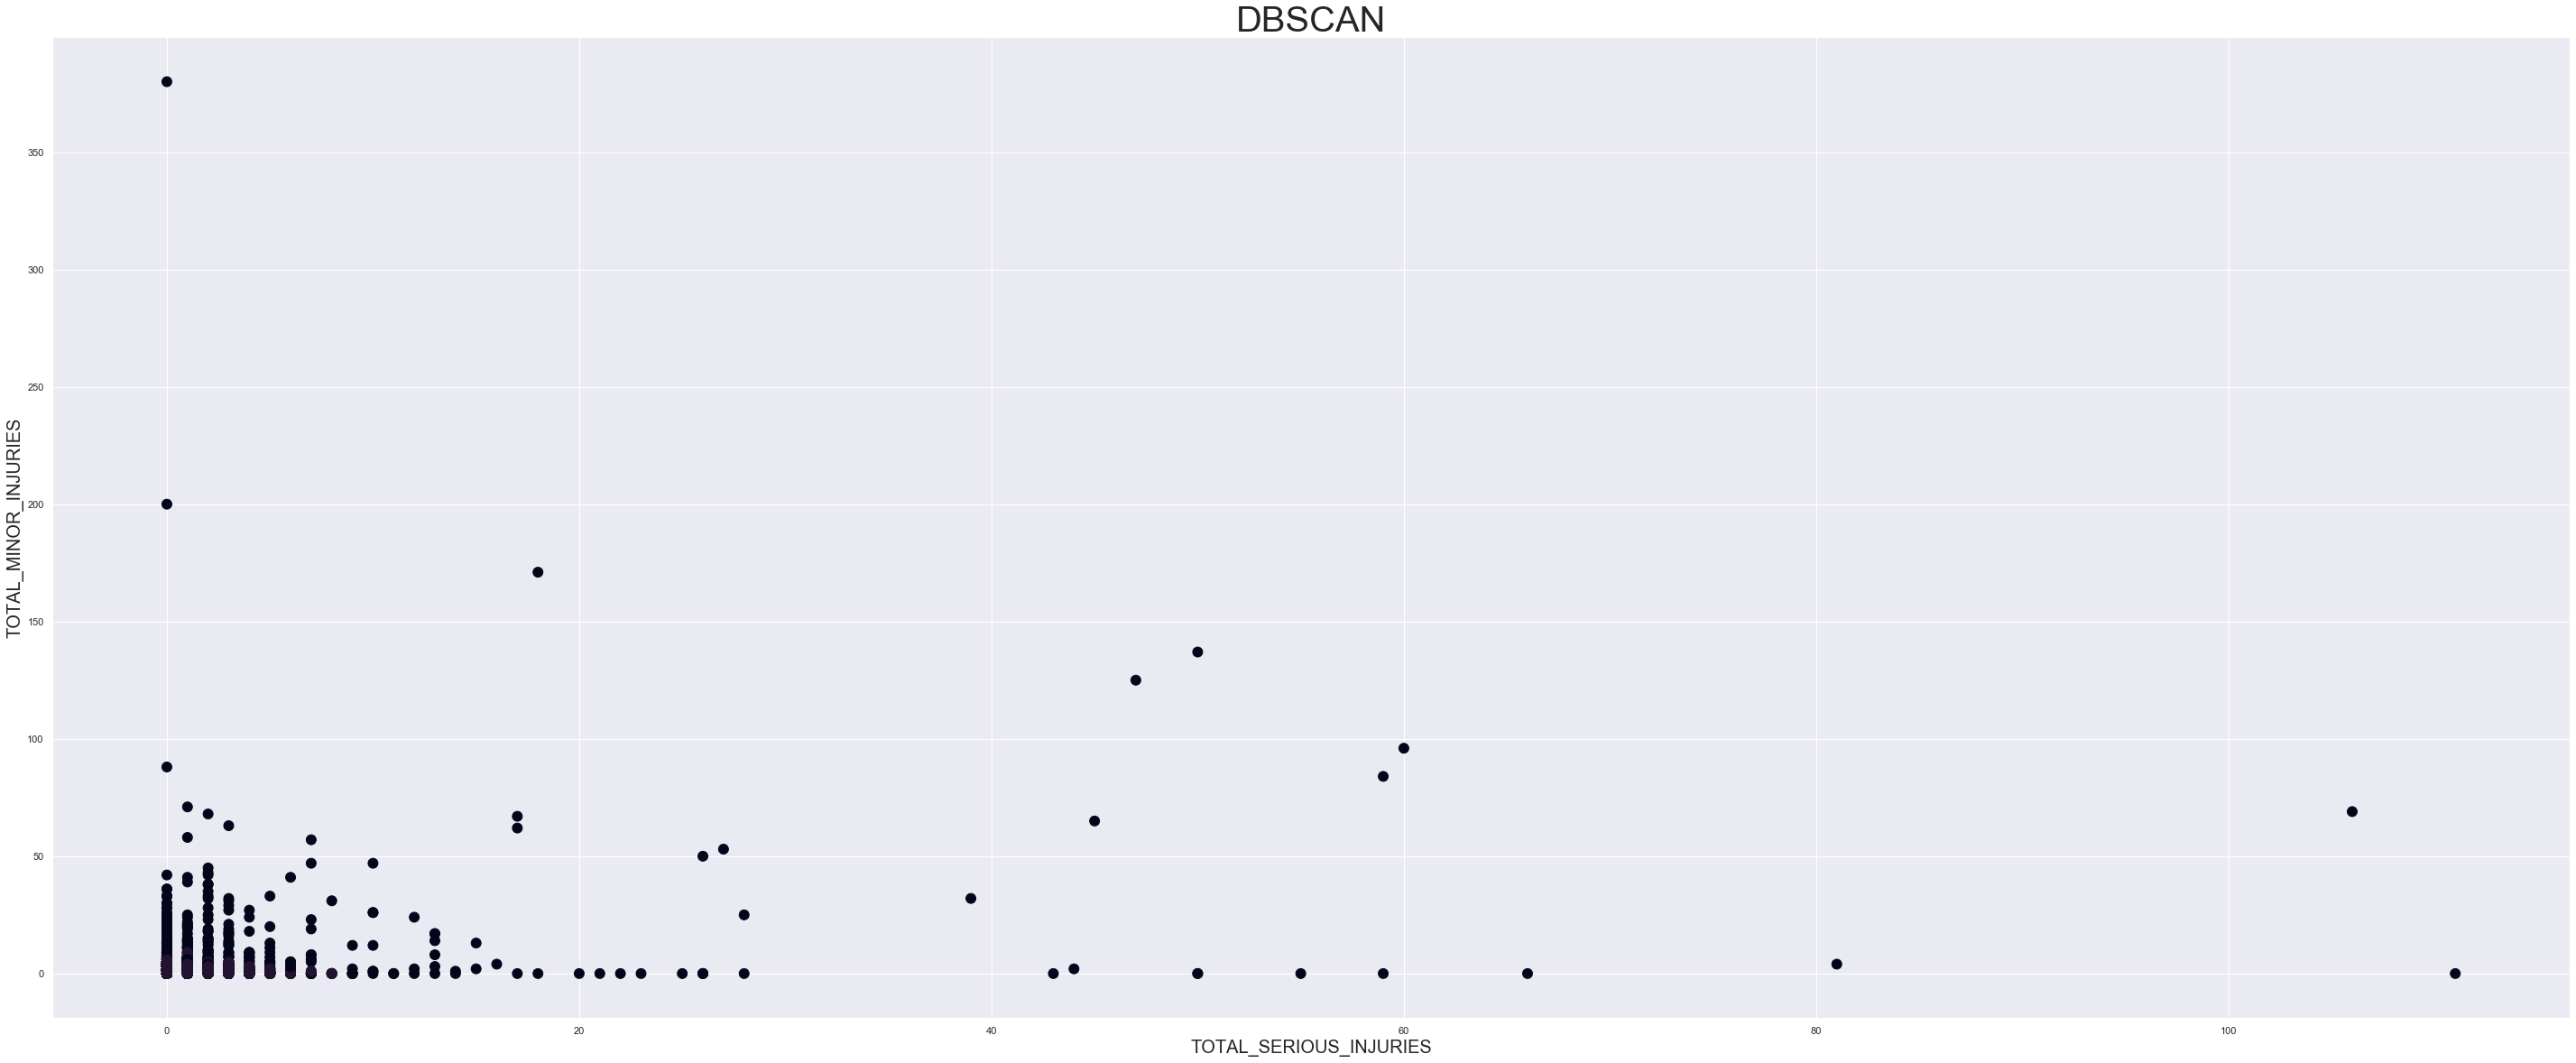

In [50]:
plt.gcf().set_size_inches(50, 20)

colors = model.labels_
plt.scatter(np.array(odd['TOTAL_SERIOUS_INJURIES']), np.array(odd['TOTAL_MINOR_INJURIES']), c=colors, s=120)

plt.xlabel('TOTAL_SERIOUS_INJURIES', fontsize = 20)
plt.ylabel('TOTAL_MINOR_INJURIES', fontsize = 20)
plt.title('DBSCAN', fontsize = 40)

Text(0.5, 1.0, 'DBSCAN')

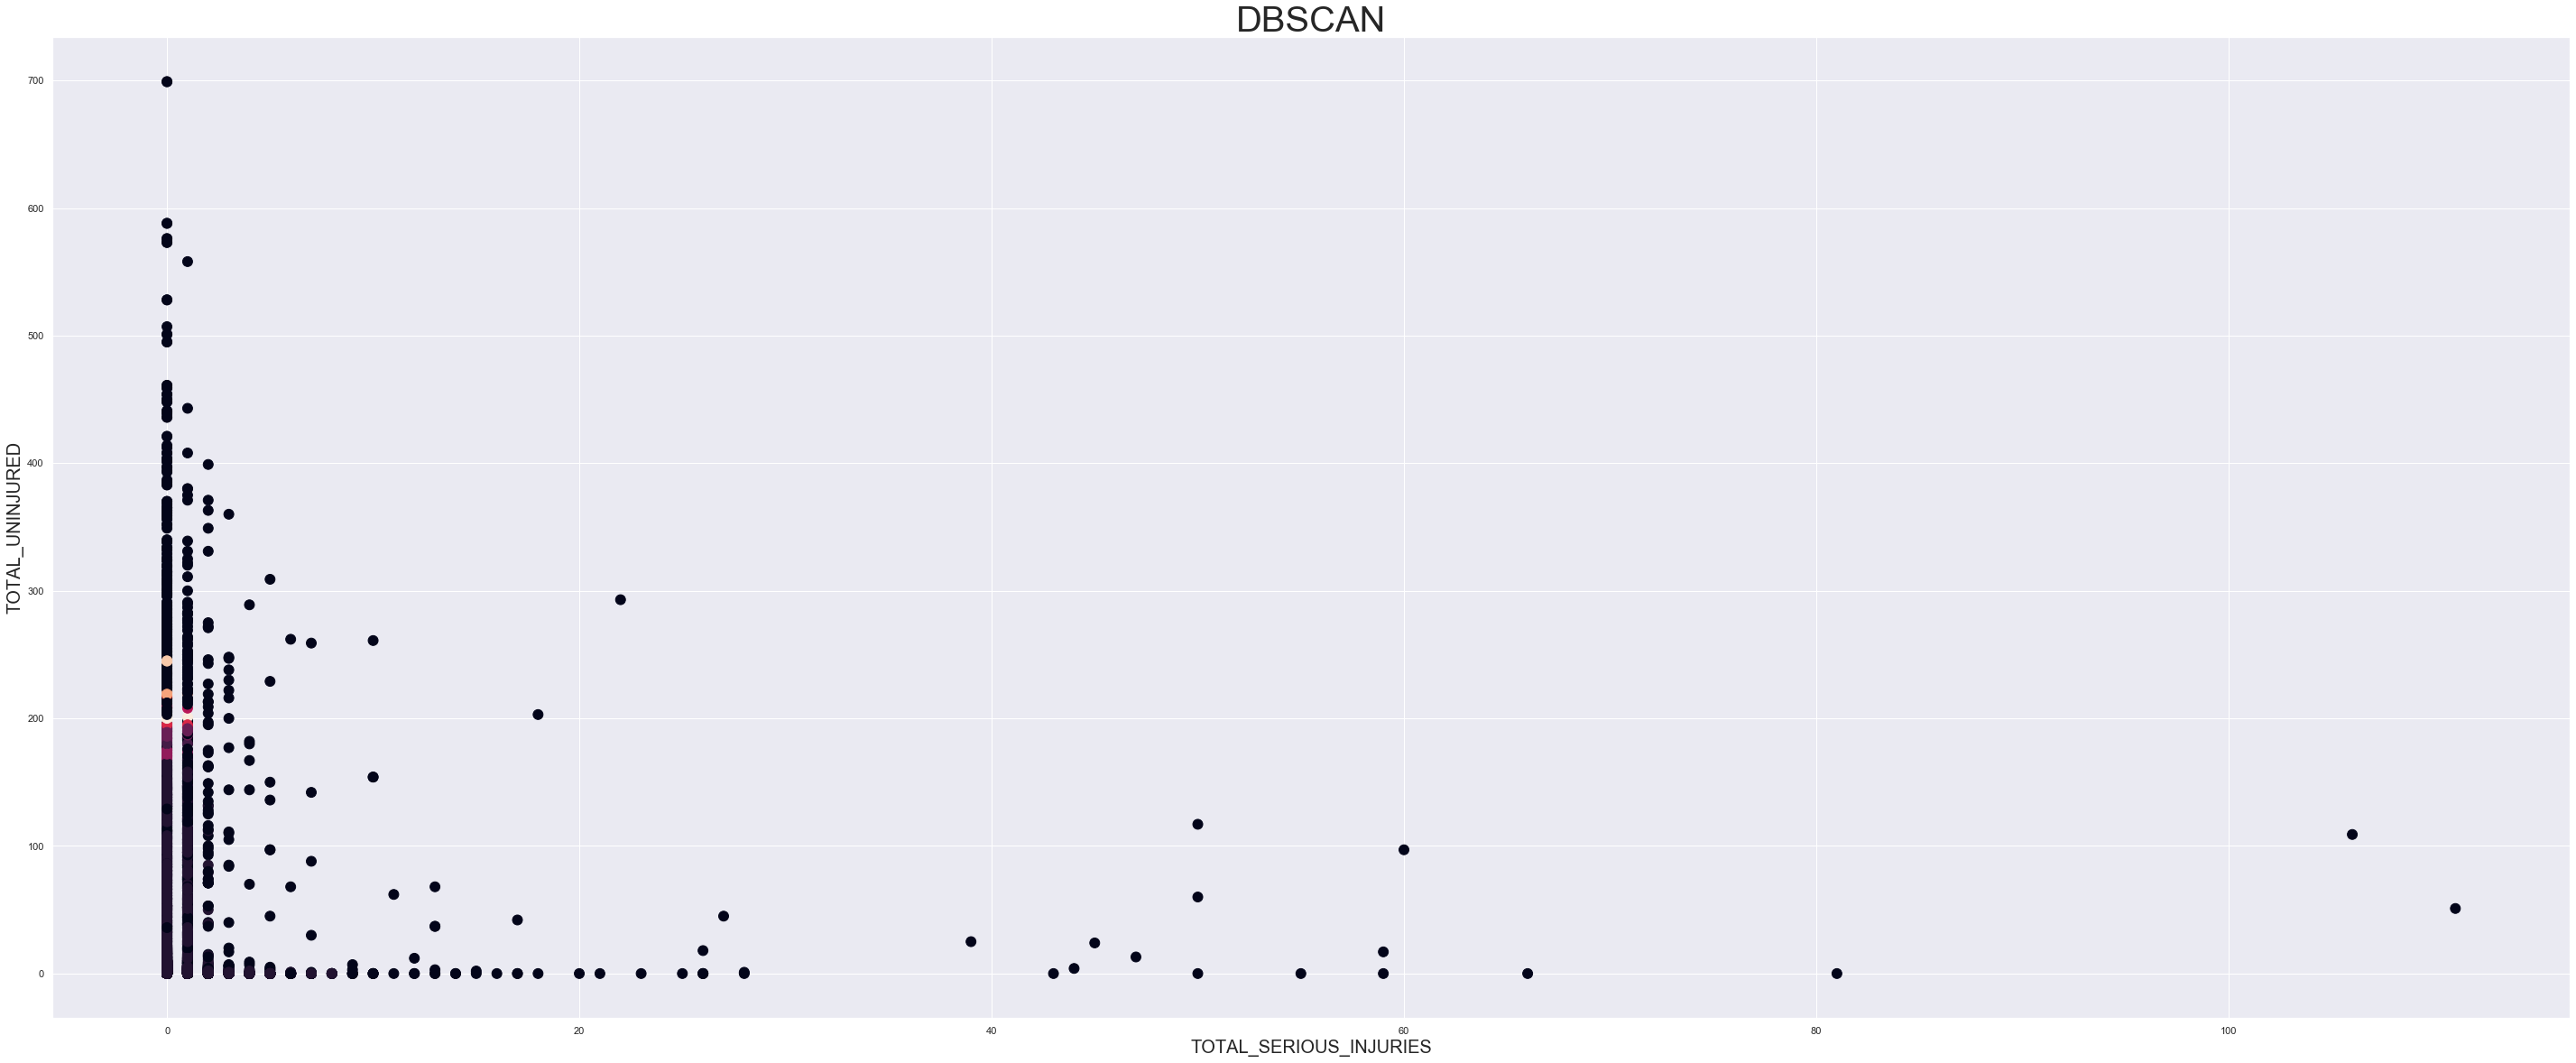

In [52]:
plt.gcf().set_size_inches(50, 20)

colors = model.labels_
plt.scatter(np.array(odd['TOTAL_SERIOUS_INJURIES']), np.array(odd['TOTAL_UNINJURED']), c=colors, s=120)

plt.xlabel('TOTAL_SERIOUS_INJURIES', fontsize = 20)
plt.ylabel('TOTAL_UNINJURED', fontsize = 20)
plt.title('DBSCAN', fontsize = 40)

Text(0.5, 1.0, 'DBSCAN')

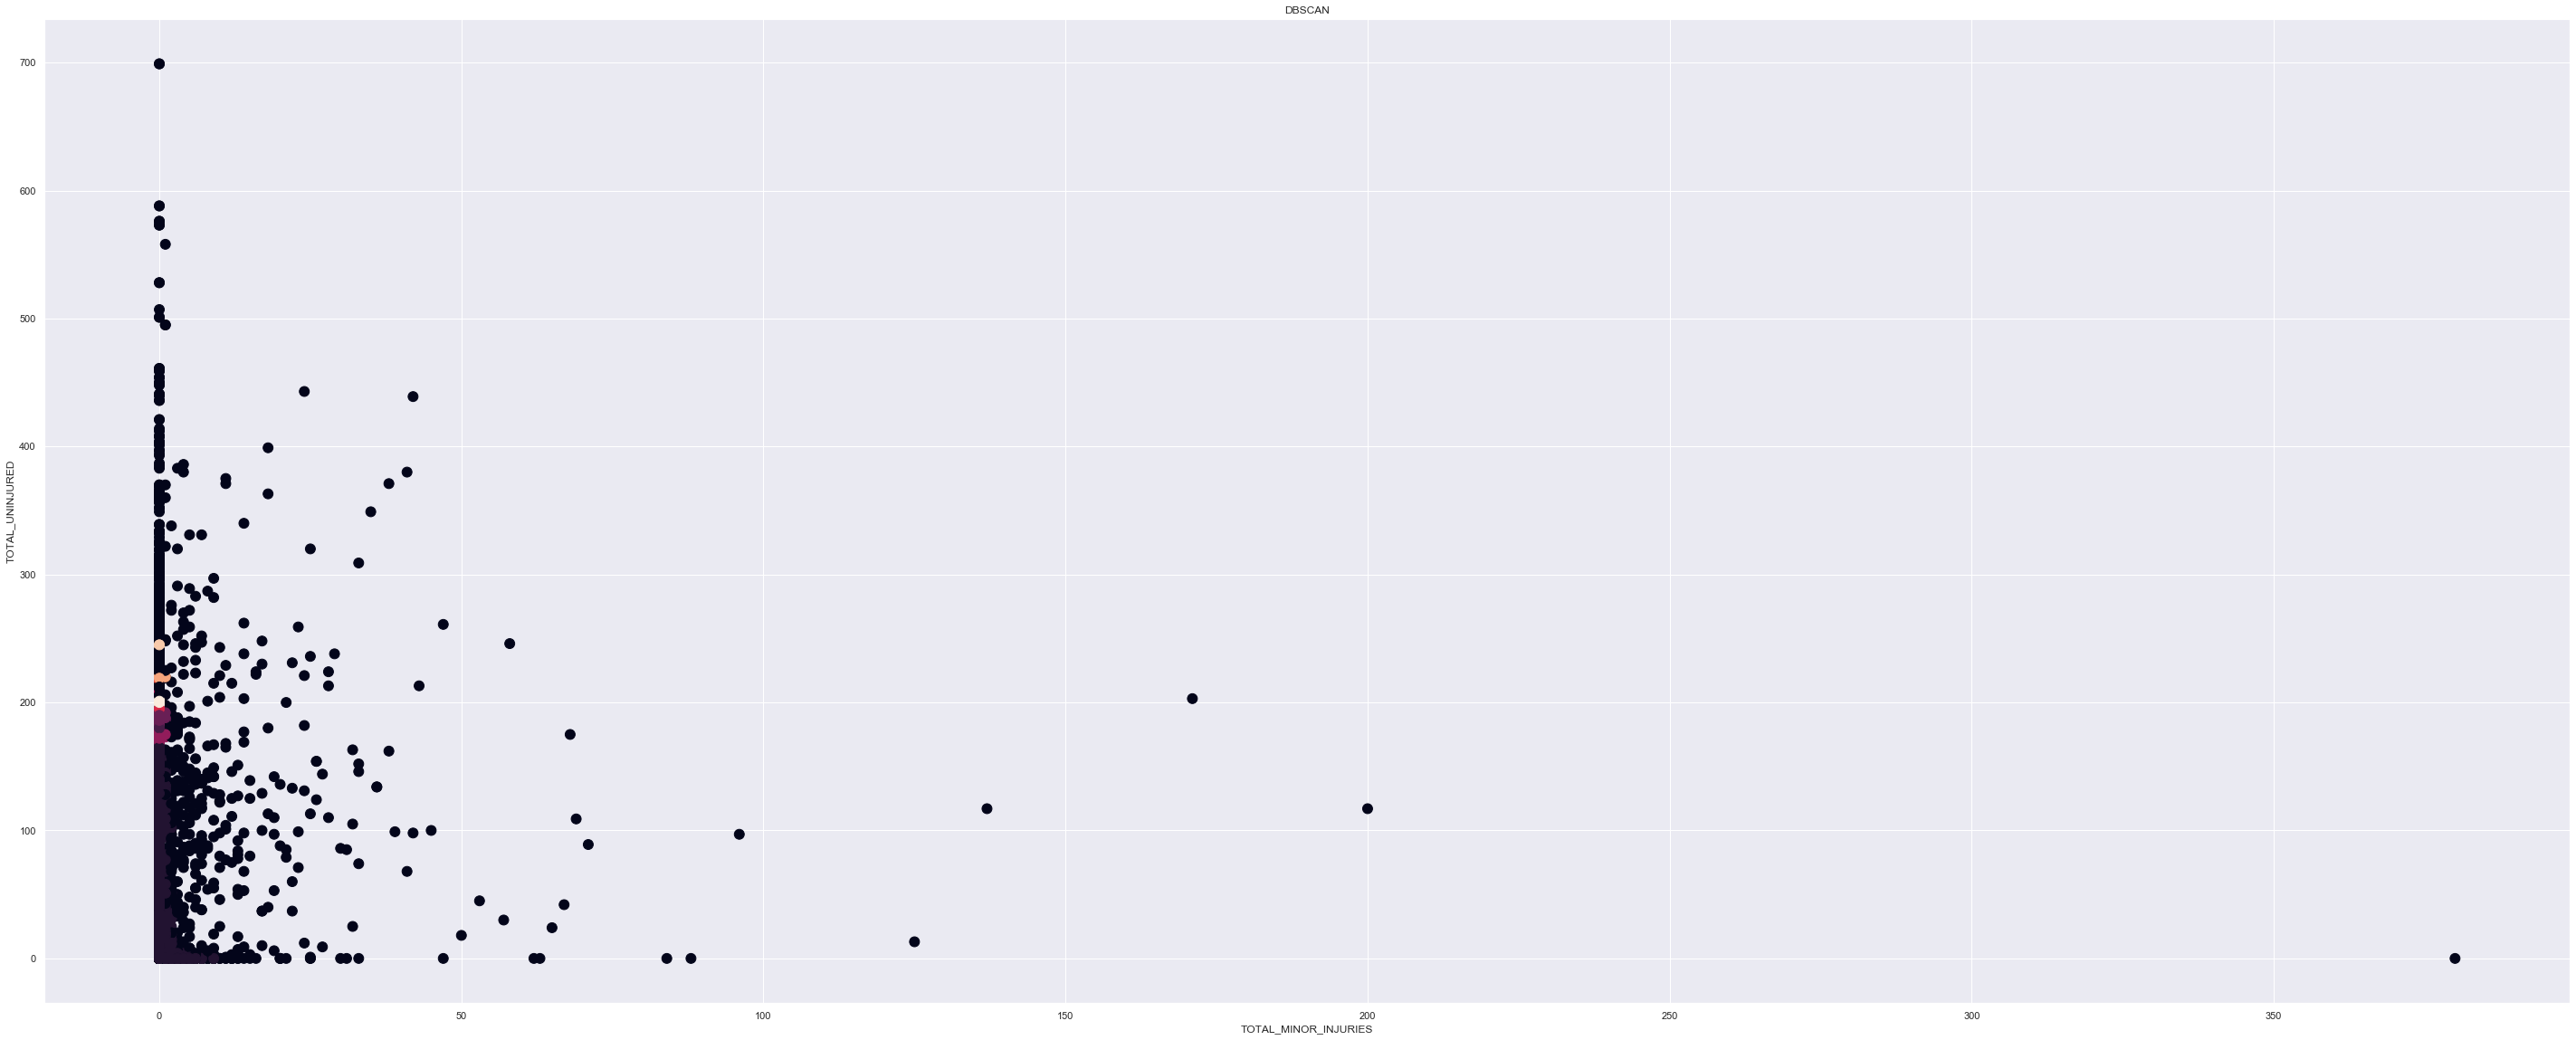

In [53]:
plt.gcf().set_size_inches(50, 20)

colors = model.labels_
plt.scatter(np.array(odd['TOTAL_MINOR_INJURIES']), np.array(odd['TOTAL_UNINJURED']), c=colors, s=120)

plt.xlabel('TOTAL_MINOR_INJURIES')
plt.ylabel('TOTAL_UNINJURED')
plt.title('DBSCAN')

In [55]:
## @Tian Quan: comments on the natural of the findings for this problem 3: about which one is outliers, etc,.